# Projet 4: Nettoyage et exploration Dataset SEATTLE 
    
<font color='gray'>
    Michel Blazevic <br /> 
    Février 2022


### Sommaire

* [1-Découverte et Nettoyage du dataset](#chapter1)
    * [1.1-Libriaires et fonctions](#section_1_1)
    * [1.2 Découverte des Datasets](#section_1_2)
        * [1.2.1 Tri individus et colonnes par cohérence des datasets](#section_1_2_1)
        * [1.2.2 Tri et traitement par valeurs manquantes](#section_1_2_2)
        * [ 1.2.3 Traitement et tri des variables pertinentes](#section_1_2_3)
* [2-Analyse exploratoire et feature engineering](#chapter2)
    * [Analyse variables qualitatives](#section_2_1)
    * [Analyse Variables quantitatives](#section_2_2)

### 1-Découverte et Nettoyage du dataset<a class="anchor" id="chapter1"></a>
Nous verrons dans cette partie la le chargement des deux bases de données de 2015 et 2016. Il y aura notamment:

    - L'importation des librairies et des fonctions utilisées dans la suite de l'étude
    - la découverte des datasets et le choix des colonnes et premier tri des individus
    - L'analyse des colonnes par type
    - Le traitement des valeurs manquantes et aberrantes
#### 1.1-Libriaires et fonctions <a class="anchor" id="section_1_1"></a>
##### Librairies :

In [67]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import time
import warnings
warnings.filterwarnings("ignore")
import missingno as msno
import folium
from joypy import joyplot

##### Fonctions :

In [68]:
def pie_types_variable(d,name=''):
    """
    Renvoie en sortie un pie plot des distributions des types de variable dans le DataFrame donné en entrée.
    """
    (d.dtypes.value_counts()).plot.pie(autopct='%1.1f%%',startangle=0)
    plt.title('Pieplot des types de variables dans la bdd',name)
    plt.ylabel('')
    plt.show()
    
def desc_df(df,name=''):
    """
    Renvoie en sortie une description du df en entrée
    """
    val_manq=df.notna().mean().mean()
    dupli=df.duplicated().sum()
    nbligne=len(df.index)
    nbcolonne=len(df.columns)
    print("Dans la base de données",name ,"on a {} lignes avec {} variables. Elle est remplie à {} % et il y a {} lignes dupliquées".format(nbligne,nbcolonne,str(val_manq*100)[:5],dupli))
    
def pie_remplissage(d,name=''):
    """
    Renvoie en sortie un pie plot du pourcentage de remplissage du df
    """
    notna=d.notna().mean().mean()*100
    na=100-notna
    labels = 'valeurs manquantes','valeurs présentes'
    sizes = [na, notna]
    explode = (0, 0.1)  # only "explode" the 2nd slice (i.e. 'Hogs')

    fig1, ax1 = plt.subplots()
    plt.figure(facecolor=None)
    ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
            shadow=True, startangle=0)
    ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
    ax1.set_title('Pie Plot Valeurs présentes/manquantes '+name)
    plt.show()
    
def piebar_categorie(ser,angle=180,lab=1):
    """
    Renvoie en sortie un pie plot et un barplot de la variable qualitative de catégorie en entrée
    """
    labels = ser.value_counts().index.values
    sizes = ser.value_counts().values


    fig, (ax1, ax2) = plt.subplots(1, 2)
    plt.figure(facecolor=None)
    ax1.pie(sizes, labels=labels, autopct='%1.1f%%',
            shadow=True, startangle=angle,labeldistance=1,rotatelabels=True)
    ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
   

    #ax1.legend(loc='lower left')
    x_pos=np.arange(len(labels))
    ax2.bar(labels,sizes)
    fig.suptitle('Affichage catégorie: pie et bar plot',fontsize=15)
    ax2.set_xlabel('categories')
    ax2.grid()
    ax2.set_xticklabels(labels=labels,rotation=90)

    plt.show()

def comparaison_columns(d1,d2):
    dif1_2=list(set(d1.columns)-set(d2.columns)) 
    dif2_1=list(set(d2.columns)-set(d1.columns))
    commun=list(set(d1.columns)-set(dif1_2))
    exte=dif1_2+dif2_1
    return dif1_2,dif2_1,commun,exte

def transform(di,ret_latitude=True):
    lat=float(di.split("'latitude': ")[1][1:].split("'")[0])
    lon=float(di.split("'latitude': ")[1][1:].split("'")[4])
    if ret_latitude:
        return lat
    else : return lon

#### 1.2 Découverte des Datasets <a class="anchor" id="section_1_2"></a>
On va commencer par loader les datasets puis faire l'étude:

In [69]:
df1=pd.read_csv('2015-building-energy-benchmarking.csv')
df2=pd.read_csv('2016-building-energy-benchmarking.csv')

In [70]:
desc_df(df1,name='de 2015')
print('\n')
desc_df(df2,name='de 2016')

Dans la base de données de 2015 on a 3340 lignes avec 47 variables. Elle est remplie à 83.11 % et il y a 0 lignes dupliquées


Dans la base de données de 2016 on a 3376 lignes avec 46 variables. Elle est remplie à 87.15 % et il y a 0 lignes dupliquées


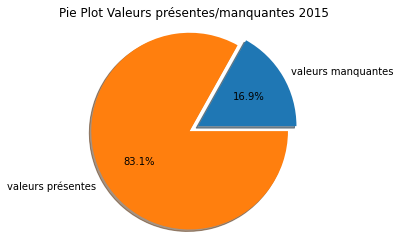

<Figure size 432x288 with 0 Axes>

In [71]:
pie_remplissage(df1,name='2015')

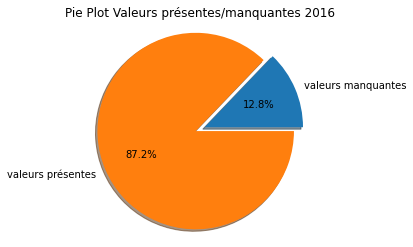

<Figure size 432x288 with 0 Axes>

In [72]:
pie_remplissage(df2,name='2016')


##### 1.2.1 Tri individus et colonnes par cohérence des datasets  <a class="anchor" id="section_1_2_1"></a>
___
 $\rightarrow$ On dispose pas du même nombre de batiment en 2016 et en 2015, on voit qu'il y a pas le même nombre de variable, on va donc faire une étude des variables communes. Cependant on va commencer par effectuer un tri sur les bâtiments qui ne sont pas des habitations:
 ___

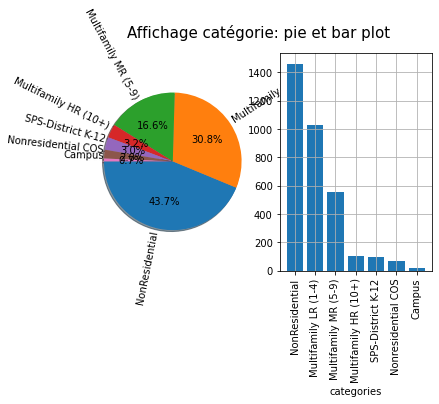

<Figure size 432x288 with 0 Axes>

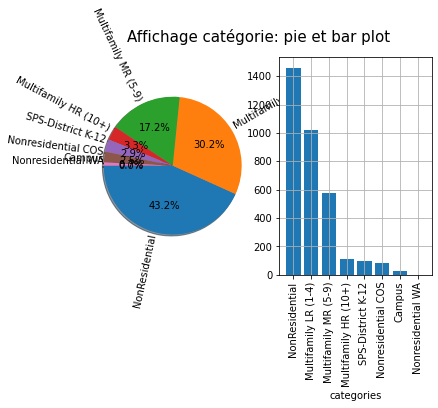

<Figure size 432x288 with 0 Axes>

In [73]:
piebar_categorie(df1.BuildingType)
piebar_categorie(df2.BuildingType)

___
$\rightarrow$ On peut voir qu'il y a beaucoup de Multifamily ce qui correspond aux logements et donc pas à ce qui nous intéresse 
___

In [74]:
buildtypeNR=['NonResidential', 'Nonresidential COS','SPS-District K-12','Campus','Nonresidential WA']

In [75]:
df1_=df1[df1.BuildingType.isin(buildtypeNR)]
df2_=df2[df2.BuildingType.isin(buildtypeNR)]

In [76]:
print('Pour 2015 on a',df1_.shape[0],'bâtiments et pour 2016 on a',df2_.shape[0],'bâtiments')

Pour 2015 on a 1650 bâtiments et pour 2016 on a 1668 bâtiments


___
On voit qu'il y a presque le même nombre de bâtiments pour 2016 et 2015, maintenant on peut voir combien de bâtiments de  sont communs entre 2015 et 2016: 
___

In [77]:
idxd1=df1_.OSEBuildingID.values
idxd2=df2_.OSEBuildingID.values

In [78]:
d15_16=list(set(idxd1)-set(idxd2))
d16_15=list(set(idxd2)-set(idxd1))
idcom=list(set(idxd1)-set(d15_16))
idext=d15_16+d16_15

In [79]:
len(idcom),len(idext)

(1620, 78)

In [80]:
df1.head()

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,TaxParcelIdentificationNumber,Location,CouncilDistrictCode,Neighborhood,YearBuilt,...,GHGEmissionsIntensity(kgCO2e/ft2),DefaultData,Comment,ComplianceStatus,Outlier,2010 Census Tracts,Seattle Police Department Micro Community Policing Plan Areas,City Council Districts,SPD Beats,Zip Codes
0,1,2015,NonResidential,Hotel,MAYFLOWER PARK HOTEL,659000030,"{'latitude': '47.61219025', 'longitude': '-122...",7,DOWNTOWN,1927,...,2.64,No,NaN,Compliant,NaN,NaN,14.0,NaN,31.0,18081
1,2,2015,NonResidential,Hotel,PARAMOUNT HOTEL,659000220,"{'latitude': '47.61310583', 'longitude': '-122...",7,DOWNTOWN,1996,...,2.38,No,NaN,Compliant,NaN,NaN,14.0,NaN,31.0,18081
2,3,2015,NonResidential,Hotel,WESTIN HOTEL,659000475,"{'latitude': '47.61334897', 'longitude': '-122...",7,DOWNTOWN,1969,...,1.92,Yes,NaN,Compliant,NaN,NaN,56.0,NaN,31.0,18081
3,5,2015,NonResidential,Hotel,HOTEL MAX,659000640,"{'latitude': '47.61421585', 'longitude': '-122...",7,DOWNTOWN,1926,...,31.38,No,NaN,Compliant,High Outlier,NaN,56.0,NaN,31.0,18081
4,8,2015,NonResidential,Hotel,WARWICK SEATTLE HOTEL,659000970,"{'latitude': '47.6137544', 'longitude': '-122....",7,DOWNTOWN,1980,...,4.02,No,NaN,Compliant,NaN,NaN,56.0,NaN,31.0,19576


idcom contient tous les 'id' des batiments communs entre le 2015 et 2016. On perderait 78 batiments ce qui reste acceptable. Mais on garde les index dans une liste et pourquoi pas les utiliser quand même

In [81]:
df1_.set_index('OSEBuildingID',inplace=True)
df2_.set_index('OSEBuildingID',inplace=True)

In [82]:
df1_=df1_.loc[idcom,:]
df2_=df2_.loc[idcom,:]

In [83]:
df1_.shape,df2_.shape

((1620, 46), (1620, 45))

___
$\rightarrow$ On dispose donc maintenant des deux datasets de 2015 et 2016. On voit qu'on a pas le même nombre de colonnes, étudions cela de plus près. 
___

In [84]:
dif_15_16,dif_16_15,commun,exte=comparaison_columns(df1_,df2_)
for k in [dif_15_16,dif_16_15,commun,exte]:
    print(len(k))

10
9
36
19


On garde les variables qui sont communes et on traite les variables extérieures à l'intersection des deux datasets. En observant les variables extérieures on peut donc sélectionner celles pertinentes pour l'étude:

    - Dans 15 mais pas dans 16:
        - Location 
        - GHGEmissions(MetricTonsCO2e)
        - GHGEmissionsIntensity(kgCO2e/ft2)
    - Dans 16 mais pas dans 15:
        - TotalGHGEmissions
        - GHGEmissionsIntensity
        
Sachant qu'on dispose de la location en terme de Latitude et Longitude en 2016 et que cette définition est présente sur 2015 dans Location, on fait une transormation afin de récupérer ces informations. 

In [85]:
df1_['Location'].head(3)

OSEBuildingID
1    {'latitude': '47.61219025', 'longitude': '-122...
2    {'latitude': '47.61310583', 'longitude': '-122...
3    {'latitude': '47.61334897', 'longitude': '-122...
Name: Location, dtype: object

In [86]:
df1_['Latitude']=df1_['Location'].apply(transform)
df1_['Longitude']=df1_['Location'].apply(transform,ret_latitude=False)

In [87]:
df1_[['GHGEmissions(MetricTonsCO2e)','GHGEmissionsIntensity(kgCO2e/ft2)']].describe()

,GHGEmissions(MetricTonsCO2e),GHGEmissionsIntensity(kgCO2e/ft2)
count,1614.000000,1614.000000
mean,166.635539,1.345297
std,558.093704,2.072210
min,0.000000,0.000000
25%,19.392500,0.170000
50%,48.670000,0.660000
75%,138.347500,1.610000
max,11824.890000,31.380000


In [88]:
df2_[[ 'TotalGHGEmissions','GHGEmissionsIntensity']].describe()

,TotalGHGEmissions,GHGEmissionsIntensity
count,1618.000000,1618.000000
mean,169.531014,1.565074
std,578.573819,2.134191
min,-0.800000,-0.020000
25%,19.780000,0.340000
50%,49.285000,0.870000
75%,137.197500,1.887500
max,12307.160000,25.710000


Pour les autres variables d'emission et d'intensité d'émission de CO2 on peut supposer que ce sont les mêmes variables à la vue des distributions On les renomme alors:

In [89]:
df1_.rename({'GHGEmissions(MetricTonsCO2e)':'Total_GHGE_Emission','GHGEmissionsIntensity(kgCO2e/ft2)':'GHGEmissionsIntensity'},axis=1,inplace=True)
df2_.rename({'TotalGHGEmissions':'Total_GHGE_Emission','GHGEmissionsIntensity':'GHGEmissionsIntensity'},axis=1,inplace=True)

In [90]:
l1,l2,_,ext=comparaison_columns(df1_,df2_)

In [91]:
ext

['Seattle Police Department Micro Community Policing Plan Areas',
 'Zip Codes',
 '2010 Census Tracts',
 'OtherFuelUse(kBtu)',
 'SPD Beats',
 'Location',
 'City Council Districts',
 'Comment',
 'Comments',
 'Address',
 'City',
 'State',
 'ZipCode']

In [92]:
df1_.drop(l1,axis=1,inplace=True)
df2_.drop(l2,axis=1,inplace=True)

In [93]:
for k in comparaison_columns(df1_,df2_):
    print(len(k))

0
0
40
0


Attardons nous sur le type des données afin de les mettre sous les mêmes types: 

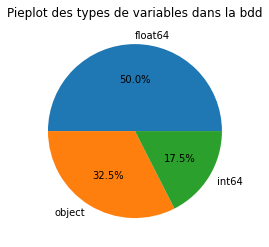

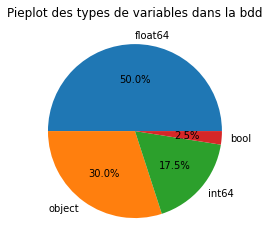

In [94]:
pie_types_variable(df1_)
pie_types_variable(df2_)

In [95]:
compare_type=pd.DataFrame()
compare_type['2015']=df1_.dtypes
compare_type['2016']=df2_.dtypes
compare_type.head()

,2015,2016
DataYear,int64,int64
BuildingType,object,object
PrimaryPropertyType,object,object
PropertyName,object,object
TaxParcelIdentificationNumber,object,object


In [96]:
compare_type[~(compare_type['2016']==compare_type['2015'])]

,2015,2016
NumberofBuildings,int64,float64
NumberofFloors,float64,int64
DefaultData,object,bool


On voit ici que NumberofBuidlings, NumberofFloors et DefaultData sont 3 variables n'étant pas sous le même type. On va les étudier afin de les traiter: 

In [97]:
df1_.NumberofBuildings.value_counts().head()

1     1608
7        2
3        2
6        2
11       1
Name: NumberofBuildings, dtype: int64

In [98]:
df2_.NumberofBuildings.value_counts().head()

1.0    1514
0.0      52
2.0      14
3.0      12
5.0       8
Name: NumberofBuildings, dtype: int64

In [99]:
df1_.NumberofBuildings.isna().mean(),df2_.NumberofBuildings.isna().mean()

(0.0, 0.0012345679012345679)

In [100]:
idx=df2_[df2_.NumberofBuildings.isna()].index

In [101]:
df1_.loc[idx].isna().mean().mean(),df2_.loc[idx].isna().mean().mean()

(0.2375, 0.6)

In [102]:
df1_.drop(idx,inplace=True)
df2_.drop(idx,inplace=True)

In [103]:
df2_.NumberofBuildings=df2_.NumberofBuildings.astype('int64')

In [104]:
df1_.NumberofFloors.unique()

array([12., 11., 41.,  1., 10., 18.,  2.,  8., 15., 25.,  9., 33.,  6.,
       28.,  5., 19.,  7.,  3.,  4., 24., 20., 34.,  0., 16., 23., 17.,
       36., 22., 47., 29., 14., 49., 37., 42., 63., 13., 21., 55., 46.,
       30., 56., 39., 27., 76., nan, 99.])

In [105]:
df2_.NumberofFloors.unique()

array([12, 11, 41,  1, 10, 18,  2,  8, 15, 25,  9, 33,  6, 28,  5, 19,  7,
        3,  4, 24, 20, 34,  0, 16, 23, 17, 36, 22, 47, 29, 14, 49, 37, 42,
       63, 13, 21, 55, 46, 30, 56, 39, 27, 76, 99], dtype=int64)

In [106]:
df1_.NumberofFloors.isna().sum(),df2_.NumberofFloors.isna().sum()

(8, 0)

In [107]:
idx=df1_[df1_.NumberofFloors.isna()].index

In [108]:
df1_.loc[idx].isna().mean().mean(),df2_.loc[idx].isna().mean().mean()

(0.18125, 0.14375)

In [109]:
df1_.drop(idx,inplace=True)
df2_.drop(idx,inplace=True)

In [110]:
df1_.NumberofFloors=df1_.NumberofFloors.astype('int64')

In [111]:
df2_.DefaultData.head()

OSEBuildingID
1        False
2        False
3        False
24579    False
5        False
Name: DefaultData, dtype: bool

In [112]:
df1_.DefaultData.value_counts()

No     1424
Yes     185
Name: DefaultData, dtype: int64

In [113]:
df2_.DefaultData.value_counts()

False    1525
True       85
Name: DefaultData, dtype: int64

DefaultData correspond à une variable permettant de savoir si au moins une des 39 autres variables à été remplacer par défault. Ayant pas plus d'information sur ça nous allons supprimer cette variable.

In [114]:
df1_.drop(['DefaultData'],axis=1,inplace=True)
df2_.drop(['DefaultData'],axis=1,inplace=True)

In [115]:
compare_type=pd.DataFrame()
compare_type['2015']=df1_.dtypes
compare_type['2016']=df2_.dtypes
compare_type[~(compare_type['2016']==compare_type['2015'])]

,2015,2016


##### 1.2.2 Tri et remplissage par valeurs manquantes<a class="anchor" id="section_1_2_2"></a>
___
On dispose des deux datasets cohérents selon les batiments mais également selon les variables. On peut observer alors le remplissage afin de pouvoir cibler trier et cibler ce qui sera interessant pour la suite
___

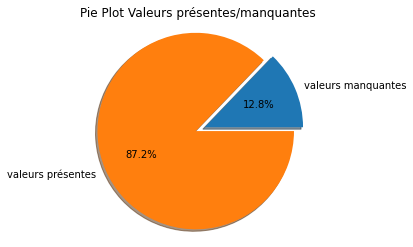

<Figure size 432x288 with 0 Axes>

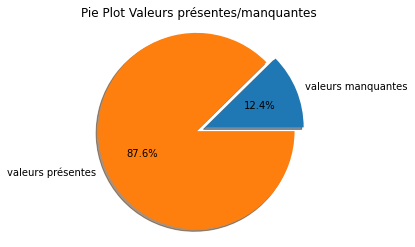

<Figure size 432x288 with 0 Axes>

In [116]:
pie_remplissage(df1_)
pie_remplissage(df2_)

In [117]:
dfisna=pd.DataFrame()
dfisna['2015']=df1_.isna().mean()
dfisna['2016']=df2_.isna().mean()

In [118]:
dfisna[((dfisna==0).sum(axis=1)<2)].head()

,2015,2016
ListOfAllPropertyUseTypes,0.032919,0.000000
LargestPropertyUseType,0.035404,0.001863
LargestPropertyUseTypeGFA,0.035404,0.001863
SecondLargestPropertyUseType,0.503727,0.484472
SecondLargestPropertyUseTypeGFA,0.503727,0.484472


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22]),
 [Text(0, 0, 'ListOfAllPropertyUseTypes'),
  Text(1, 0, 'LargestPropertyUseType'),
  Text(2, 0, 'LargestPropertyUseTypeGFA'),
  Text(3, 0, 'SecondLargestPropertyUseType'),
  Text(4, 0, 'SecondLargestPropertyUseTypeGFA'),
  Text(5, 0, 'ThirdLargestPropertyUseType'),
  Text(6, 0, 'ThirdLargestPropertyUseTypeGFA'),
  Text(7, 0, 'YearsENERGYSTARCertified'),
  Text(8, 0, 'ENERGYSTARScore'),
  Text(9, 0, 'SiteEUI(kBtu/sf)'),
  Text(10, 0, 'SiteEUIWN(kBtu/sf)'),
  Text(11, 0, 'SourceEUI(kBtu/sf)'),
  Text(12, 0, 'SourceEUIWN(kBtu/sf)'),
  Text(13, 0, 'SiteEnergyUse(kBtu)'),
  Text(14, 0, 'SiteEnergyUseWN(kBtu)'),
  Text(15, 0, 'SteamUse(kBtu)'),
  Text(16, 0, 'Electricity(kWh)'),
  Text(17, 0, 'Electricity(kBtu)'),
  Text(18, 0, 'NaturalGas(therms)'),
  Text(19, 0, 'NaturalGas(kBtu)'),
  Text(20, 0, 'Total_GHGE_Emission'),
  Text(21, 0, 'GHGEmissionsIntensity'),
  Text(22, 0, 'Outlier

<Figure size 7200x3600 with 0 Axes>

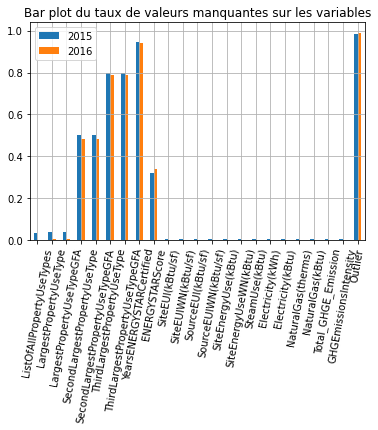

In [119]:
plt.figure(figsize=(100,50))
ax = dfisna[((dfisna==0).sum(axis=1)<2)].plot.bar()
ax.set_title('Bar plot du taux de valeurs manquantes sur les variables')
ax.grid()
plt.xticks(rotation=80 )

On voit que les valeurs manquantes sont similairement distribuées sur les variables entre 2015 et 2016. On peut dans un premier temps se permettre de supprimer celles-là:

In [120]:
lst_drop=dfisna[((dfisna>0.4).sum(axis=1)==2)].index.values

In [121]:
df1_.drop(lst_drop,axis=1,inplace=True)
df2_.drop(lst_drop,axis=1,inplace=True)

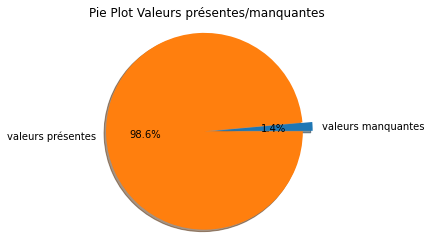

<Figure size 432x288 with 0 Axes>

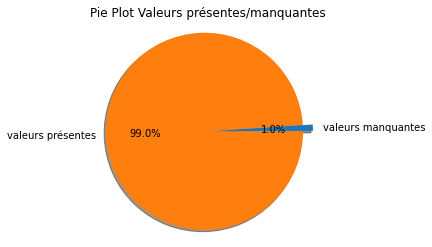

<Figure size 432x288 with 0 Axes>

(None, None)

In [122]:
pie_remplissage(df1_),pie_remplissage(df2_)

On se retrouve avec seulement 1% de valeurs manquantes pour les deux datasets. Voyons la corrélation entre les valeurs manquantes dans les variables:

In [123]:
dfisna=pd.DataFrame()
dfisna['2015']=df1_.isna().mean()
dfisna['2016']=df2_.isna().mean()

In [124]:
df_colna=dfisna[(dfisna!=0).sum(axis=1)>0]

In [125]:
df_colna['2015']

ListOfAllPropertyUseTypes    0.032919
LargestPropertyUseType       0.035404
LargestPropertyUseTypeGFA    0.035404
ENERGYSTARScore              0.319876
SiteEUI(kBtu/sf)             0.003727
SiteEUIWN(kBtu/sf)           0.003727
SourceEUI(kBtu/sf)           0.003727
SourceEUIWN(kBtu/sf)         0.003727
SiteEnergyUse(kBtu)          0.003727
SiteEnergyUseWN(kBtu)        0.003727
SteamUse(kBtu)               0.003727
Electricity(kWh)             0.003727
Electricity(kBtu)            0.003727
NaturalGas(therms)           0.003727
NaturalGas(kBtu)             0.003727
Total_GHGE_Emission          0.003727
GHGEmissionsIntensity        0.003727
Name: 2015, dtype: float64

<AxesSubplot:>

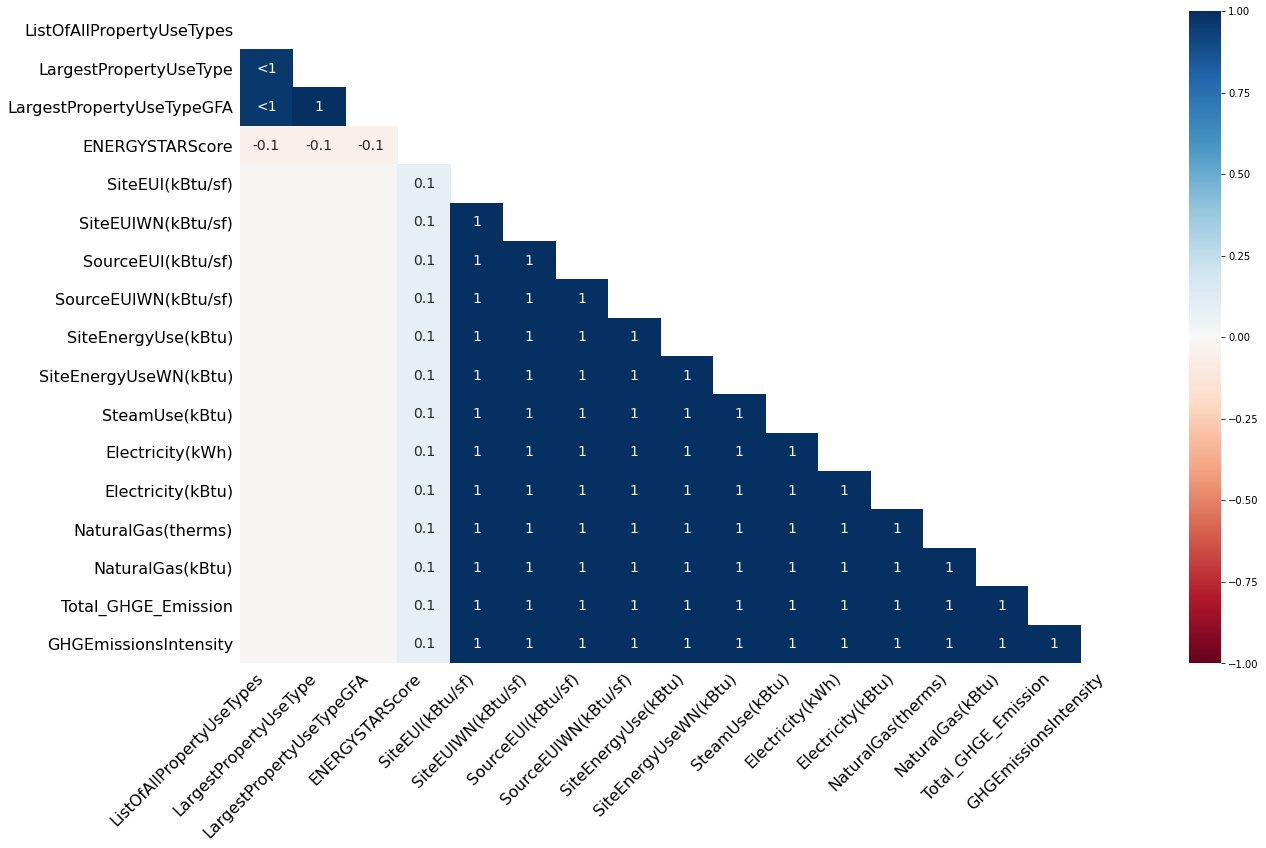

In [126]:
msno.heatmap(df1_[df_colna['2015'].index.values])

<AxesSubplot:>

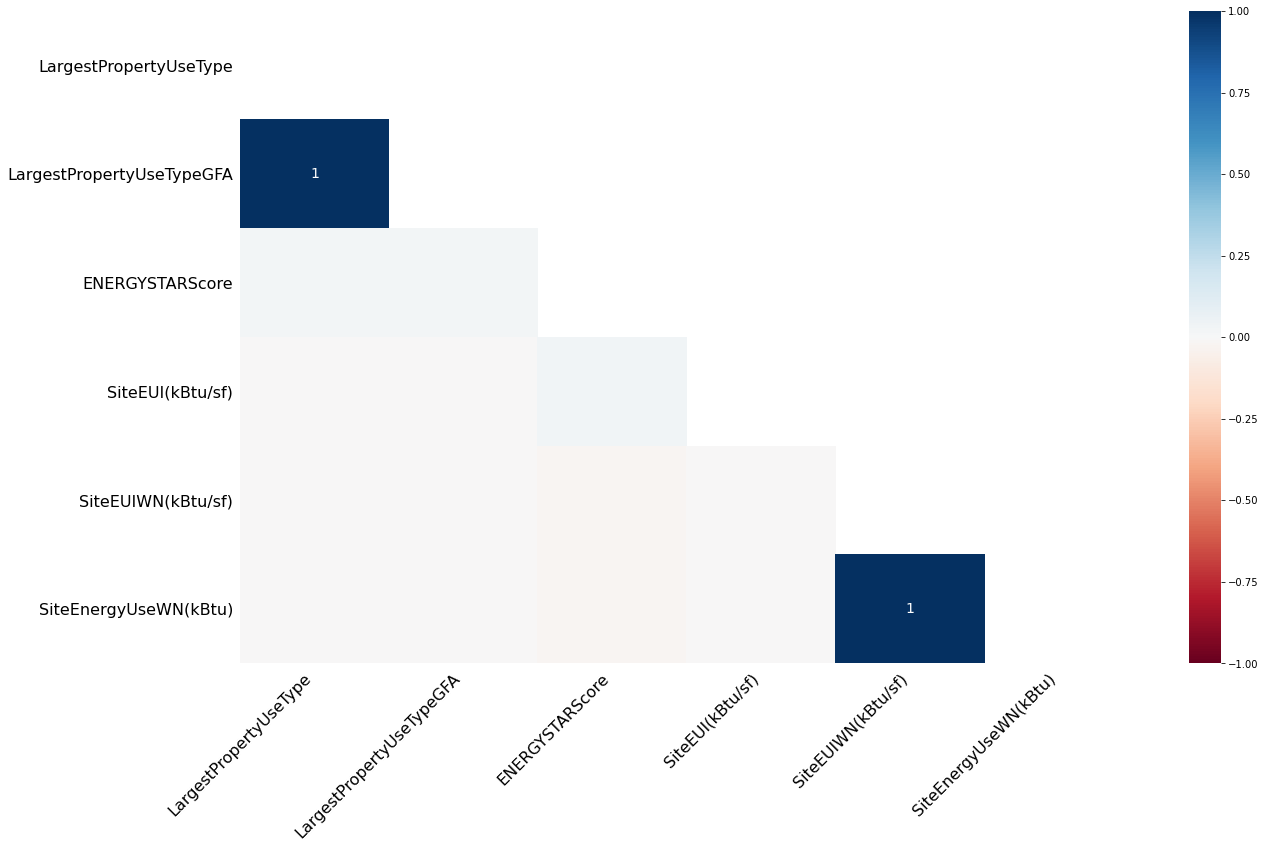

In [127]:
msno.heatmap(df2_[df_colna['2016'].index.values])

In [128]:
idxd2=df2_.loc[(df2_.isna().mean(axis=1)>0.04)].index.values

In [129]:
idxd1=df1_.loc[(df1_.isna().mean(axis=1)>0.04)].index.values

In [130]:
d15_16=list(set(idxd1)-set(idxd2))
d16_15=list(set(idxd2)-set(idxd1))
idcom=list(set(idxd1)-set(d15_16))
idext=d15_16+d16_15

In [131]:
df1_.drop(idcom+idext,inplace=True)
df2_.drop(idcom+idext,inplace=True)

In [132]:
df2_.shape,df1_.shape

((1545, 33), (1545, 33))

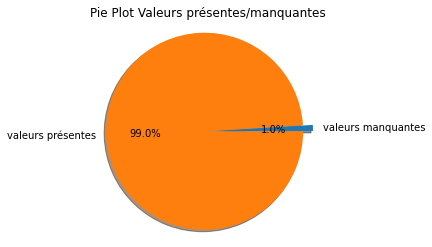

<Figure size 432x288 with 0 Axes>

In [133]:
pie_remplissage(df1_)

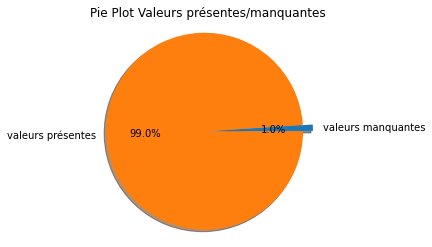

<Figure size 432x288 with 0 Axes>

In [134]:
pie_remplissage(df2_)

___
##### 1.2.3 Traitement et tri des variables pertinentes<a class="anchor" id="section_1_2_3"></a>
Dans l'objectif final de ce projet, on doit effectuer une prédiction de l'energie et de l'emission de CO2. On peut alors effectuer un tri et garder seulement les variables qui nous seront utiles pour la suite.


In [135]:
df1_.dtypes[(df1_.dtypes==object)], df1_.dtypes[(df1_.dtypes==float)],df1_.dtypes[(df1_.dtypes=='int64')]

(BuildingType                     object
 PrimaryPropertyType              object
 PropertyName                     object
 TaxParcelIdentificationNumber    object
 Neighborhood                     object
 ListOfAllPropertyUseTypes        object
 LargestPropertyUseType           object
 ComplianceStatus                 object
 dtype: object,
 LargestPropertyUseTypeGFA    float64
 ENERGYSTARScore              float64
 SiteEUI(kBtu/sf)             float64
 SiteEUIWN(kBtu/sf)           float64
 SourceEUI(kBtu/sf)           float64
 SourceEUIWN(kBtu/sf)         float64
 SiteEnergyUse(kBtu)          float64
 SiteEnergyUseWN(kBtu)        float64
 SteamUse(kBtu)               float64
 Electricity(kWh)             float64
 Electricity(kBtu)            float64
 NaturalGas(therms)           float64
 NaturalGas(kBtu)             float64
 Total_GHGE_Emission          float64
 GHGEmissionsIntensity        float64
 Latitude                     float64
 Longitude                    float64
 dtype: ob

---
###### Suppressions variables pas utiles
Variables pas utiles: 

    - PropertyName: un nom qui donne pas d'indication
    - TaxParcelIdentificationNumber: un id non utile
    - ComplianceStatus: Conformité du batiment sur une analyse comparative de l'energie mais difficilement interpretable
    - BuildingType car trop vaste et on a d'autres variables plus précises
    
    

In [136]:
lst_drop=['PropertyName','TaxParcelIdentificationNumber','ComplianceStatus','BuildingType']

In [137]:
df1_.drop(lst_drop,axis=1,inplace=True)
df2_.drop(lst_drop,axis=1,inplace=True)

--- 
On voit également que dans les variables quantitatives on a des informations en kWh, therms, Kbtu, kBtu/sf... On va étudier afin de voir lesquelles sont pertinentes mais aussi pour pas doubler l'information et garder un seul exemplaire de chaque variable.




Text(0.5, 1.0, 'Heatmap des corrélations')

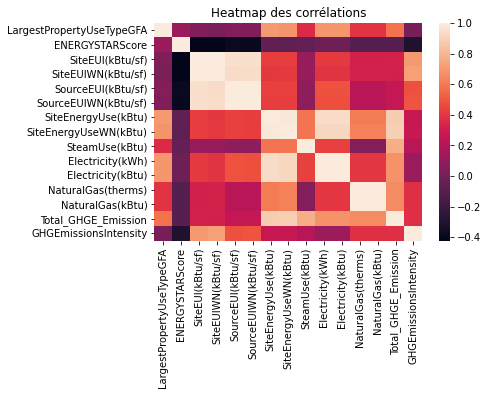

In [138]:
sns.heatmap(df1_[df1_.dtypes[(df1_.dtypes=='float64')].index[:-2]].corr())
plt.title('Heatmap des corrélations')

Toujours en lisant les informations des métadonnées (.json) On a des informations sur les kbtu et WN. Comme ce sont simplement des conversions  et la plus part des informations sont en kbtu on va garder cette unité. WN est une normalisation par rapport à la tempature des variables concernées. On voit que c'est très corrélé donc on garde la non normalisée:

In [139]:
df1_[df1_.dtypes[(df1_.dtypes=='float64')].index[:-2]].corr()

,LargestPropertyUseTypeGFA,ENERGYSTARScore,SiteEUI(kBtu/sf),SiteEUIWN(kBtu/sf),SourceEUI(kBtu/sf),SourceEUIWN(kBtu/sf),SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),Total_GHGE_Emission,GHGEmissionsIntensity
LargestPropertyUseTypeGFA,1.000000,0.122705,0.040910,0.024607,0.055664,0.042077,0.701858,0.686446,0.360630,0.692784,0.692784,0.389693,0.389693,0.573092,0.012628
ENERGYSTARScore,0.122705,1.000000,-0.414620,-0.421834,-0.383809,-0.390751,-0.064885,-0.072264,-0.051117,-0.026564,-0.026564,-0.109613,-0.109613,-0.096382,-0.301701
SiteEUI(kBtu/sf),0.040910,-0.414620,1.000000,0.996131,0.955644,0.957928,0.422576,0.423497,0.116061,0.416689,0.416689,0.321811,0.321811,0.325593,0.703817
SiteEUIWN(kBtu/sf),0.024607,-0.421834,0.996131,1.000000,0.939903,0.947448,0.406874,0.413179,0.112195,0.393594,0.393594,0.326802,0.326803,0.321997,0.726158
SourceEUI(kBtu/sf),0.055664,-0.383809,0.955644,0.939903,1.000000,0.997596,0.434211,0.430964,0.089441,0.486227,0.486227,0.226122,0.226122,0.265728,0.482073
SourceEUIWN(kBtu/sf),0.042077,-0.390751,0.957928,0.947448,0.997596,1.000000,0.424935,0.427283,0.086608,0.473774,0.473774,0.226877,0.226877,0.262207,0.493458
SiteEnergyUse(kBtu),0.701858,-0.064885,0.422576,0.406874,0.434211,0.424935,1.000000,0.992887,0.583575,0.939326,0.939326,0.607665,0.607665,0.884869,0.268118
SiteEnergyUseWN(kBtu),0.686446,-0.072264,0.423497,0.413179,0.430964,0.427283,0.992887,1.000000,0.583639,0.922490,0.922490,0.623127,0.623127,0.890776,0.277610
SteamUse(kBtu),0.360630,-0.051117,0.116061,0.112195,0.089441,0.086608,0.583575,0.583639,1.000000,0.436579,0.436579,0.054617,0.054617,0.774472,0.219708
Electricity(kWh),0.692784,-0.026564,0.416689,0.393594,0.486227,0.473774,0.939326,0.922490,0.436579,1.000000,1.000000,0.401141,0.401141,0.680811,0.130191


In [140]:
lst_drop=['Electricity(kWh)','NaturalGas(therms)','SiteEUIWN(kBtu/sf)','SourceEUIWN(kBtu/sf)','SiteEnergyUseWN(kBtu)']

In [141]:
df1_.drop(lst_drop,axis=1,inplace=True)
df2_.drop(lst_drop,axis=1,inplace=True)

---
###### Modification variables de catégories
Variables utiles: 
                 
    - PrimaryPropertyType          
    - ListOfAllPropertyUseTypes 
    - LargestPropertyUseType 
    - CouncilDistrictCode     

    
Dans un premier temps on peut s'interesser à l'utilisation du batiment, notamment en faisant un choix sur la variable à utiliser

In [142]:
df1_.PrimaryPropertyType.unique(),df1_.LargestPropertyUseType.unique()

(array(['Hotel', 'Other', 'Non-Refrigerated Warehouse',
        'Mixed Use Property', 'K-12 School', 'College/University',
        'Small- and Mid-Sized Office', 'Self-Storage Facility\n',
        'Distribution Center\n', 'Refrigerated Warehouse', 'Large Office',
        'Retail Store', 'Senior Care Community',
        'Supermarket/Grocery Store', 'Medical Office', 'Hospital',
        'Residence Hall/Dormitory', 'Worship Facility', 'Restaurant\n',
        'Low-Rise Multifamily'], dtype=object),
 array(['Hotel', 'Other', 'Other - Entertainment/Public Assembly',
        'Police Station', 'Non-Refrigerated Warehouse', 'Library',
        'Fitness Center/Health Club/Gym', 'Social/Meeting Hall',
        'Courthouse', 'K-12 School', 'College/University',
        'Automobile Dealership', 'Office', 'Self-Storage Facility',
        'Distribution Center', 'Refrigerated Warehouse', 'Retail Store',
        'Other - Recreation', 'Other - Education', 'Senior Care Community',
        'Supermarket/Groc

In [143]:
d15_16=list(set(df1_.PrimaryPropertyType.unique())-set(df2_.PrimaryPropertyType.unique()))
d16_15=list(set(df2_.PrimaryPropertyType.unique())-set(df1_.PrimaryPropertyType.unique()))
idcom1=list(set(df1_.PrimaryPropertyType.unique())-set(d15_16))
idext=d15_16+d16_15



In [144]:
len(d15_16),len(d16_15),len(idcom)

(7, 8, 3)

In [145]:
d15_16=list(set(df1_.LargestPropertyUseType.unique())-set(df2_.LargestPropertyUseType.unique()))
d16_15=list(set(df2_.LargestPropertyUseType.unique())-set(df1_.LargestPropertyUseType.unique()))
idcom=list(set(df1_.LargestPropertyUseType.unique())-set(d15_16))
idext=d15_16+d16_15



In [146]:
len(d15_16),len(d16_15),len(idcom)

(0, 0, 54)

In [147]:
# On fait un dict afin de pouvoir renommer toutes les catégories en les rassemblant par utilité plus générale. 
rename={'K-12 School':'Enseignement',
        'College/University':'Enseignement',
        'Other - Education':'Enseignement',
        'Adult Education':'Enseignement',
        'Pre-school/Daycare':'Enseignement',
        'University':'Enseignement',
        
        
        
        'Senior Care Community':'servicepublic',
        'Hospital':'servicepublic',
        'Medical Office':'servicepublic',
        'Hospital (General Medical & Surgical)':'servicepublic',
        'Other/Specialty Hospital':'servicepublic',
        'Laboratory':'servicepublic',
        'Urgent Care/Clinic/Other Outpatient':'servicepublic',
        
        
        
        
        
        
        
        
        'Small- and Mid-Sized Office':'bureau',
        'Large Office':'bureau',
        'Medical Office':'bureau',
        'Office':'bureau',
        'Financial Office':'bureau',
        'Data Center':'bureau',
        'Manufacturing/Industrial Plant':'bureau',
        
        
        
        
        
        
        
        
        'Worship Facility':'entertainment',
        'Restaurant\n':'entertainment',
        'Other - Entertainment/Public Assembly':'entertainment',
        'Social/Meeting Hall':'entertainment',
        'Other - Recreation':'entertainment',
        'Museum':'entertainment',
        'Wholesale Club/Supercenter':'entertainment',
        'Lifestyle Center':'entertainment',
        'Restaurant':'entertainment',
        'Restaurant\n':'entertainment',
        'Other - Restaurant/Bar':'entertainment',
        'Food Service':'entertainment',
        'Performing Arts':'entertainment',
        'Personal Services (Health/Beauty, Dry Cleaning, etc)':'entertainment',
        'Movie Theater':'entertainment',
        
        
        
        
        
        
        
        
        
        'Hotel':'Logement-hotel',
        'Residence Hall/Dormitory':'Logement-hotel',
        'Low-Rise Multifamily':'Logement-hotel',
        'Other - Lodging/Residential':'Logement-hotel',
        'Residence Hall/Dormit':'Logement-hotel',
        'Residential Care Facility':'Logement-hotel',
        'Multifamily Housing':'Logement-hotel',
        
        
        
        
        
        
        'Police Station':'servicepublic',
        'Courthouse':'servicepublic',
        'Other - Services':'servicepublic',
        'Other - Public Services':'servicepublic',
        'Bank Branch':'servicepublic',
        'Fire Station':'servicepublic',
        
        
        
        
        
        
        
        'Non-Refrigerated Warehouse':'commerce',
        'Self-Storage Facility\n':'commerce',
        'Self-Storage Facility':'commerce',
        'Distribution Center\n':'commerce',
        'Distribution Center':'commerce',
        'Refrigerated Warehouse':'commerce',
        'Warehouse':'commerce',
        'Retail Store':'commerce',
        'Supermarket/Grocery Store':'commerce',
        'Supermarket / Grocery Store':'commerce',
        'Library':'commerce',
        'Fitness Center/Health Club/Gym':'commerce',
        'Automobile Dealership':'commerce',
        'Repair Services (Vehicle, Shoe, Locksmith, etc)':'commerce',
        'Strip Mall':'commerce',
        'Other - Mall':'commerce',
        
        
        
        
        
        
        
        
        
        
        'Other':'Autre',
        'Mixed Use Property':'Autre',
        'Parking':'servicepublic',    
        'Other - Utility':'Autre',

        
       }


In [148]:
df1_.LargestPropertyUseType.replace(rename).value_counts(),df2_.LargestPropertyUseType.replace(rename).value_counts()

(bureau            516
 commerce          445
 Enseignement      156
 entertainment     145
 Logement-hotel    101
 Autre              97
 servicepublic      85
 Name: LargestPropertyUseType, dtype: int64,
 bureau            512
 commerce          444
 Enseignement      156
 entertainment     147
 Logement-hotel    101
 Autre              97
 servicepublic      88
 Name: LargestPropertyUseType, dtype: int64)

In [149]:
df1_.PrimaryPropertyType.replace(rename).value_counts(),df2_.PrimaryPropertyType.replace(rename).value_counts()

(bureau            473
 commerce          394
 Autre             338
 Enseignement      149
 Logement-hotel     84
 entertainment      79
 servicepublic      28
 Name: PrimaryPropertyType, dtype: int64,
 bureau            469
 commerce          393
 Autre             333
 Enseignement      149
 entertainment      80
 Logement-hotel     69
 servicepublic      37
 Residence Hall     15
 Name: PrimaryPropertyType, dtype: int64)

Par choix je décide d'utiliser seulement la variable de l'utilisation principale sur la surface, on peut supposer que les variables sont sans doutes corrélés. Cependant, on pourrait par la suite porter plus d'importance aux autres utilisation comme faire un pourcentage avec la surface ou autre. 

In [150]:
df1_.drop('PrimaryPropertyType',axis=1,inplace=True)
df2_.drop('PrimaryPropertyType',axis=1,inplace=True)

In [151]:
df1_.drop('ListOfAllPropertyUseTypes',axis=1,inplace=True)
df2_.drop('ListOfAllPropertyUseTypes',axis=1,inplace=True)

In [152]:
df1_.LargestPropertyUseType.replace(rename,inplace=True)
df2_.LargestPropertyUseType.replace(rename,inplace=True)

___
Choix entre Neighborhood et CouncilDistrict:

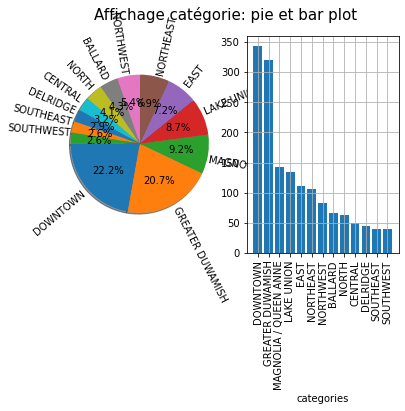

<Figure size 432x288 with 0 Axes>

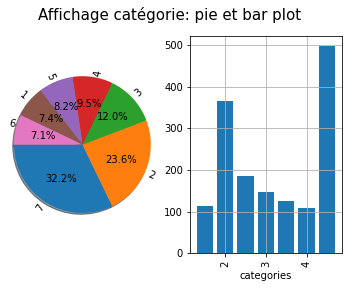

<Figure size 432x288 with 0 Axes>

In [153]:
piebar_categorie(df1_.Neighborhood)
piebar_categorie(df1_.CouncilDistrictCode)

Par des soucis technique pour l'affiche de la carte avec folium le code ci dessus à été compilé dans un autre mais voici les résultats retournés: 
___
m = folium.Map(location=df1_[['Latitude','Longitude']].mean().values.tolist(), zoom_start=11)

i=0

colors2=['red', 'blue', 'green', 'purple', 'orange', 'darkred',
'lightred' ,'beige', 'darkblue', 'darkgreen', 'cadetblue', 'darkpurple', 'white', 'pink', 'lightblue', 'lightgreen', 'gray', 'black', 'lightgray']

colors=list(mcolors.CSS4_COLORS.keys())

for k in df1_.Neighborhood.unique():

    d_=df1_[df1_.Neighborhood==k][['Latitude','Longitude']]
    for l in range(len(d_)):
        folium.Marker(
          location=[d_.iloc[l]['Latitude'],d_.iloc[l]['Longitude']],
          popup=k,
        icon=folium.Icon(color=colors2[i]),
       ).add_to(m)
    print(k,colors[idx_col[i]])
    i+=1
    
m
___
La même chose est effectué avec CouncilDistrictCode et on observe ça: 
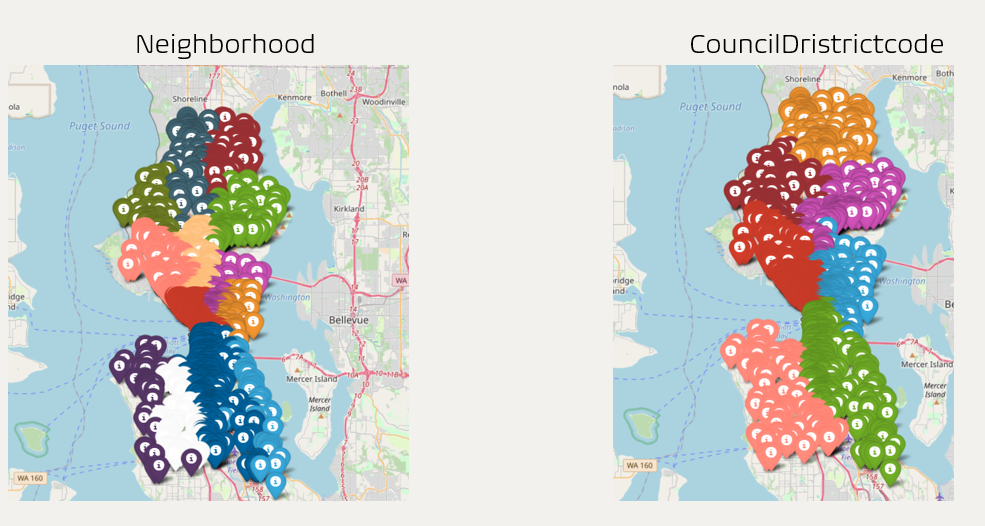


Donc on voit que des quartiers de Neightborhood sont compris comme des coucildistrict. je me suis permi de garder CouncilDistrictcode.

In [154]:
df1_.drop('Neighborhood',axis=1,inplace=True)
df2_.drop('Neighborhood',axis=1,inplace=True)

##### On élimine les valeurs aberrantes tel que les valeurs négatives 

In [155]:
df1_.describe()

,DataYear,CouncilDistrictCode,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),LargestPropertyUseTypeGFA,ENERGYSTARScore,SiteEUI(kBtu/sf),SourceEUI(kBtu/sf),SiteEnergyUse(kBtu),SteamUse(kBtu),Electricity(kBtu),NaturalGas(kBtu),Total_GHGE_Emission,GHGEmissionsIntensity,Latitude,Longitude
count,1545.0,1545.000000,1545.000000,1545.000000,1545.000000,1.545000e+03,1545.000000,1.545000e+03,1.545000e+03,1048.000000,1545.000000,1545.000000,1.545000e+03,1.545000e+03,1.545000e+03,1.545000e+03,1545.000000,1545.000000,1545.000000,1545.000000
mean,2015.0,4.371521,1961.346278,1.052427,4.154693,1.113370e+05,13393.874434,9.794315e+04,9.087365e+04,64.248092,70.857476,174.690744,7.515015e+06,4.268310e+05,5.326880e+06,1.747429e+06,162.886356,1.345340,47.616107,-122.333527
std,0.0,2.204380,32.717088,1.089503,6.666657,1.932610e+05,44187.154261,1.684905e+05,1.582296e+05,28.465625,70.218114,175.932048,1.872697e+07,4.866871e+06,1.310535e+07,5.861391e+06,558.510749,2.078286,0.048234,0.024362
min,2015.0,1.000000,1900.000000,1.000000,0.000000,2.000000e+04,-2.000000,-5.055000e+04,5.872000e+03,1.000000,0.000000,-2.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,47.509435,-122.411662
25%,2015.0,2.000000,1930.000000,1.000000,1.000000,2.974000e+04,0.000000,2.876000e+04,2.550000e+04,47.000000,32.900000,76.000000,1.216543e+06,0.000000e+00,7.256140e+05,0.000000e+00,19.390000,0.170000,47.585340,-122.344203
50%,2015.0,4.000000,1965.000000,1.000000,2.000000,4.892500e+04,0.000000,4.721500e+04,4.293900e+04,72.000000,51.600000,131.800000,2.454861e+06,0.000000e+00,1.612512e+06,4.709450e+05,48.150000,0.660000,47.612326,-122.333266
75%,2015.0,7.000000,1989.000000,1.000000,4.000000,1.035660e+05,0.000000,9.355500e+04,8.843400e+04,88.000000,81.600000,205.400000,6.807227e+06,0.000000e+00,4.843740e+06,1.429408e+06,136.340000,1.640000,47.649165,-122.322337
max,2015.0,7.000000,2014.000000,39.000000,99.000000,2.200000e+06,512608.000000,2.200000e+06,1.719643e+06,100.000000,800.600000,2511.100000,2.958126e+08,1.278697e+08,2.847263e+08,1.364484e+08,11824.890000,31.380000,47.733811,-122.258819


In [156]:
df2_.describe()

,DataYear,CouncilDistrictCode,Latitude,Longitude,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),LargestPropertyUseTypeGFA,ENERGYSTARScore,SiteEUI(kBtu/sf),SourceEUI(kBtu/sf),SiteEnergyUse(kBtu),SteamUse(kBtu),Electricity(kBtu),NaturalGas(kBtu),Total_GHGE_Emission,GHGEmissionsIntensity
count,1545.0,1545.000000,1545.000000,1545.000000,1545.000000,1545.000000,1545.000000,1.545000e+03,1545.000000,1.545000e+03,1.545000e+03,1016.000000,1545.000000,1545.000000,1.545000e+03,1.545000e+03,1.545000e+03,1.545000e+03,1545.000000,1545.000000
mean,2016.0,4.372816,47.616089,-122.333528,1961.346278,1.100971,4.154693,1.115471e+05,12737.619417,9.880949e+04,9.073521e+04,65.447835,71.313722,174.024595,7.523614e+06,4.301016e+05,5.265841e+06,1.807643e+06,165.912835,1.565877
std,0.0,2.203280,0.048199,0.024342,32.717088,1.165748,6.666657,1.940573e+05,42340.894213,1.723265e+05,1.570877e+05,28.354220,71.665101,178.188548,1.866074e+07,4.950774e+06,1.284618e+07,6.099881e+06,568.379898,2.120198
min,2016.0,1.000000,47.509590,-122.411820,1900.000000,0.000000,0.000000,1.630000e+04,0.000000,3.636000e+03,5.656000e+03,1.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,-1.154170e+05,0.000000e+00,-0.800000,-0.020000
25%,2016.0,2.000000,47.585530,-122.344090,1930.000000,1.000000,1.000000,2.963600e+04,0.000000,2.858600e+04,2.554700e+04,49.000000,33.299999,75.300003,1.228114e+06,0.000000e+00,7.197790e+05,0.000000e+00,19.810000,0.340000
50%,2016.0,4.000000,47.612330,-122.333230,1965.000000,1.000000,2.000000,4.906600e+04,0.000000,4.695800e+04,4.305000e+04,73.000000,51.700001,131.000000,2.502131e+06,0.000000e+00,1.581352e+06,5.038750e+05,49.280000,0.870000
75%,2016.0,7.000000,47.649130,-122.322290,1989.000000,1.000000,4.000000,1.030000e+05,0.000000,9.355500e+04,8.883000e+04,89.000000,81.400002,202.100006,6.794584e+06,0.000000e+00,4.747403e+06,1.475252e+06,134.690000,1.890000
max,2016.0,7.000000,47.733870,-122.258640,2014.000000,27.000000,99.000000,2.200000e+06,512608.000000,2.200000e+06,1.719643e+06,100.000000,707.299988,2217.800049,2.930908e+08,1.349435e+08,2.745325e+08,1.381912e+08,12307.160000,25.710000


In [157]:
lst_neg=['PropertyGFAParking','PropertyGFABuilding(s)','SourceEUI(kBtu/sf)','Electricity(kBtu)','Total_GHGE_Emission','GHGEmissionsIntensity']

In [158]:
lst_indexdrop=[]

In [159]:
lst_indexdrop+=df1_.loc[((df1_[lst_neg]<0).sum(axis=1)!=0)].index.tolist()

In [160]:
lst_indexdrop+=df2_.loc[((df2_[lst_neg]<0).sum(axis=1)!=0)].index.tolist()

In [161]:
lst_indexdrop

[50002, 29551, 29788, 49784, 49784]

In [162]:
df1_.drop(lst_indexdrop[:-1],inplace=True)
df2_.drop(lst_indexdrop[:-1],inplace=True)

On vient donc de supprimer tous mes batiments où il y avait des valeurs négatives. On va faire une dernière inspection:

In [163]:
df1_.describe()

,DataYear,CouncilDistrictCode,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),LargestPropertyUseTypeGFA,ENERGYSTARScore,SiteEUI(kBtu/sf),SourceEUI(kBtu/sf),SiteEnergyUse(kBtu),SteamUse(kBtu),Electricity(kBtu),NaturalGas(kBtu),Total_GHGE_Emission,GHGEmissionsIntensity,Latitude,Longitude
count,1541.0,1541.000000,1541.000000,1541.000000,1541.000000,1.541000e+03,1541.000000,1.541000e+03,1.541000e+03,1045.000000,1541.000000,1541.000000,1.541000e+03,1.541000e+03,1.541000e+03,1.541000e+03,1541.000000,1541.000000,1541.000000,1541.000000
mean,2015.0,4.372485,1961.240104,1.052563,4.149254,1.114975e+05,13310.846853,9.818666e+04,9.094896e+04,64.197129,70.934393,174.833225,7.528632e+06,4.279389e+05,5.334816e+06,1.751965e+06,163.268092,1.348533,47.616083,-122.333539
std,0.0,2.205099,32.686341,1.090914,6.672763,1.934849e+05,44153.215961,1.686204e+05,1.584265e+05,28.480238,70.285708,176.094167,1.874924e+07,4.873139e+06,1.312126e+07,5.868321e+06,559.185059,2.080034,0.048278,0.024374
min,2015.0,1.000000,1900.000000,1.000000,0.000000,2.000000e+04,0.000000,1.092500e+04,5.872000e+03,1.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,47.509435,-122.411662
25%,2015.0,2.000000,1930.000000,1.000000,1.000000,2.963600e+04,0.000000,2.880000e+04,2.548100e+04,47.000000,32.900000,76.000000,1.216543e+06,0.000000e+00,7.256140e+05,0.000000e+00,19.400000,0.170000,47.585207,-122.344203
50%,2015.0,4.000000,1965.000000,1.000000,2.000000,4.892500e+04,0.000000,4.723700e+04,4.284400e+04,72.000000,51.600000,131.800000,2.454861e+06,0.000000e+00,1.612512e+06,4.769000e+05,48.600000,0.670000,47.612294,-122.333271
75%,2015.0,7.000000,1989.000000,1.000000,4.000000,1.036970e+05,0.000000,9.361000e+04,8.849000e+04,88.000000,81.800000,206.200000,6.832991e+06,0.000000e+00,4.855382e+06,1.430124e+06,136.600000,1.640000,47.649165,-122.322402
max,2015.0,7.000000,2014.000000,39.000000,99.000000,2.200000e+06,512608.000000,2.200000e+06,1.719643e+06,100.000000,800.600000,2511.100000,2.958126e+08,1.278697e+08,2.847263e+08,1.364484e+08,11824.890000,31.380000,47.733811,-122.258819


In [164]:
df2_.describe()

,DataYear,CouncilDistrictCode,Latitude,Longitude,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),LargestPropertyUseTypeGFA,ENERGYSTARScore,SiteEUI(kBtu/sf),SourceEUI(kBtu/sf),SiteEnergyUse(kBtu),SteamUse(kBtu),Electricity(kBtu),NaturalGas(kBtu),Total_GHGE_Emission,GHGEmissionsIntensity
count,1541.0,1541.000000,1541.000000,1541.000000,1541.000000,1541.000000,1541.000000,1.541000e+03,1541.000000,1.541000e+03,1.541000e+03,1013.000000,1541.000000,1541.000000,1.541000e+03,1.541000e+03,1.541000e+03,1.541000e+03,1541.000000,1541.00000
mean,2016.0,4.373783,47.616066,-122.333538,1961.240104,1.101233,4.149254,1.117016e+05,12770.682674,9.893092e+04,9.081017e+04,65.390918,71.398767,174.175341,7.537598e+06,4.312180e+05,5.274262e+06,1.812335e+06,166.306911,1.56926
std,0.0,2.203996,0.048243,0.024354,32.686341,1.167250,6.672763,1.942844e+05,42390.863464,1.725325e+05,1.572832e+05,28.370592,71.731490,178.359039,1.868281e+07,4.957150e+06,1.286155e+07,6.107101e+06,569.064589,2.12189
min,2016.0,1.000000,47.509590,-122.411820,1900.000000,0.000000,0.000000,1.630000e+04,0.000000,3.636000e+03,5.656000e+03,1.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.00000
25%,2016.0,2.000000,47.585470,-122.344090,1930.000000,1.000000,1.000000,2.963100e+04,0.000000,2.858400e+04,2.552100e+04,49.000000,33.299999,75.300003,1.228114e+06,0.000000e+00,7.197790e+05,0.000000e+00,19.820000,0.34000
50%,2016.0,4.000000,47.612330,-122.333250,1965.000000,1.000000,2.000000,4.905200e+04,0.000000,4.680000e+04,4.300000e+04,73.000000,51.700001,131.000000,2.502131e+06,0.000000e+00,1.581352e+06,5.040570e+05,49.440000,0.87000
75%,2016.0,7.000000,47.649130,-122.322320,1989.000000,1.000000,4.000000,1.030000e+05,0.000000,9.361000e+04,8.907500e+04,89.000000,81.500000,202.199997,6.797647e+06,0.000000e+00,4.757299e+06,1.481167e+06,134.820000,1.89000
max,2016.0,7.000000,47.733870,-122.258640,2014.000000,27.000000,99.000000,2.200000e+06,512608.000000,2.200000e+06,1.719643e+06,100.000000,707.299988,2217.800049,2.930908e+08,1.349435e+08,2.745325e+08,1.381912e+08,12307.160000,25.71000


On peut maintenant s'interesser à l'exploration et à une analyse de données: 

---
### Analyse exploratoire et feature engineering <a class="anchor" id="chapter2"></a>
___
Dans cette partie nous allons observer et essayer de comprendre la base de données afin de pouvoir récupérer et préparer les données dans la partie suivante:  
___
#### 2.1 Analyse variables quantitatives <a class="anchor" id="section_2_1"></a>


<AxesSubplot:xlabel='Longitude', ylabel='Latitude'>

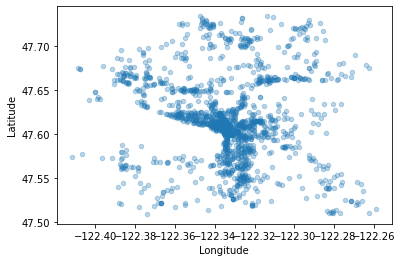

In [165]:
df1_[['Latitude','Longitude']].plot(kind='scatter',x='Longitude',y='Latitude',alpha=0.3,
                                   )

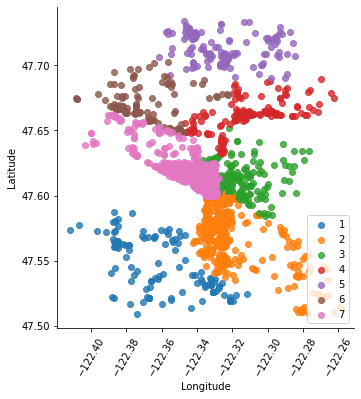

In [166]:
 
sns.lmplot( x="Longitude", y="Latitude", data=df1_, fit_reg=False, hue='CouncilDistrictCode', legend=False)
 
plt.legend(loc='lower right')
plt.xticks(rotation=60)

plt.show()

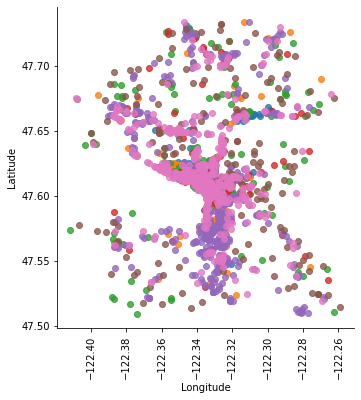

In [167]:
sns.lmplot( x="Longitude", y="Latitude", data=df1_, fit_reg=False, hue='LargestPropertyUseType', legend=False)
 
#plt.legend(loc='lower right')
plt.xticks(rotation=90)
plt.show()

In [168]:
lst_colquant=(df1_.loc[:,(df1_.dtypes=='int64')|(df1_.dtypes=='float64')].drop(['Latitude','Longitude'],axis=1)).columns.tolist()

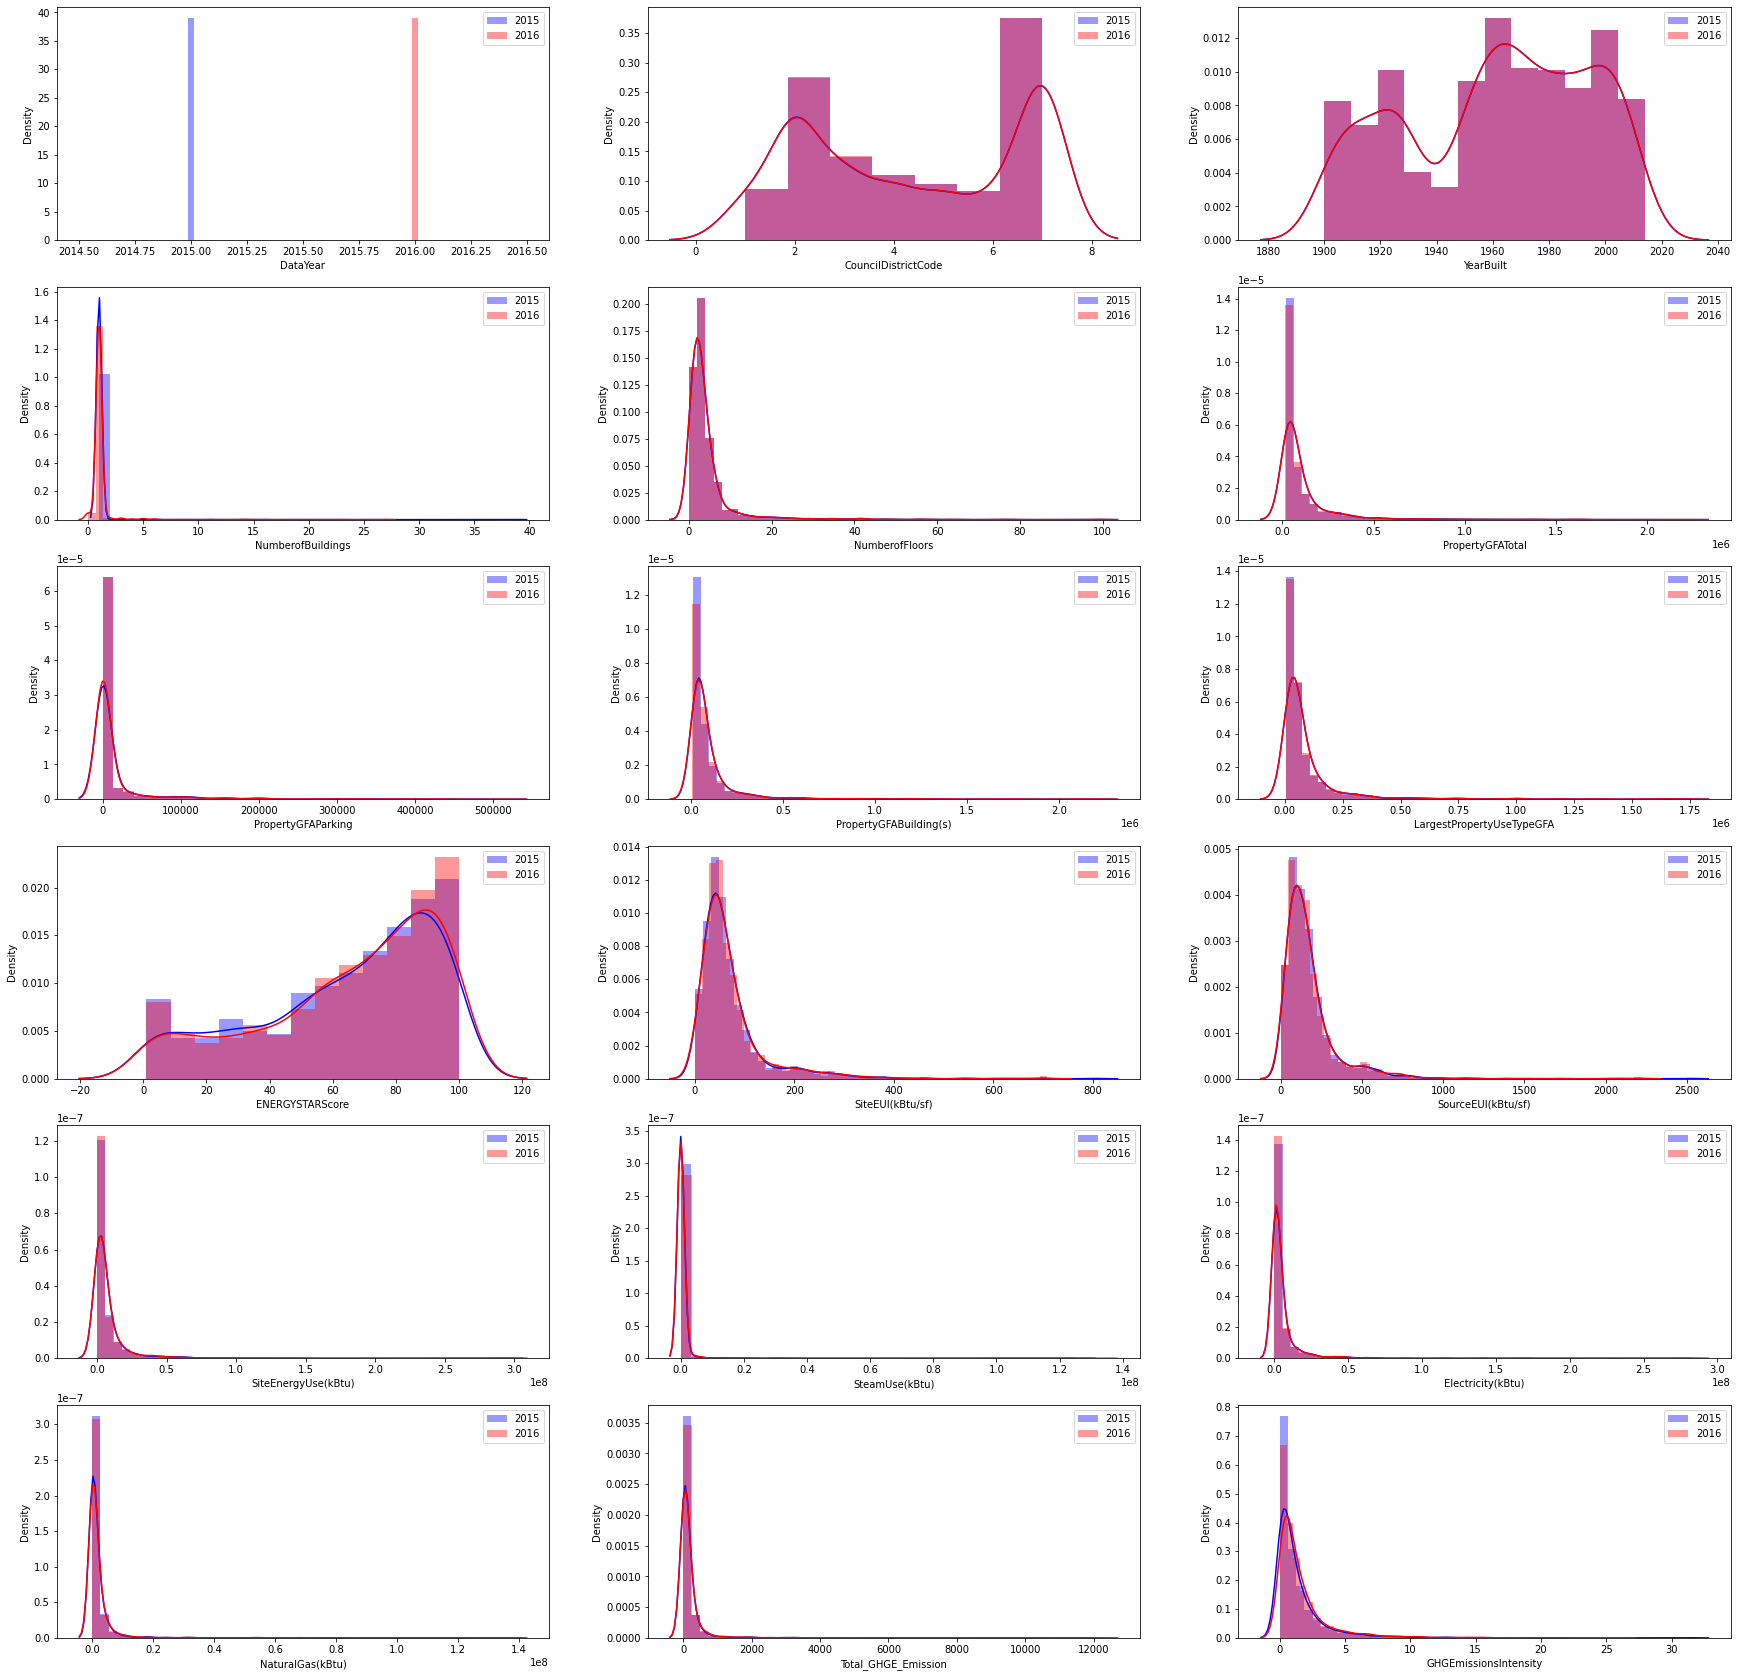

In [169]:
n_rows = 6
n_cols = 3
f, axes = plt.subplots(n_rows, n_cols, figsize=(30, 30))

ax_list = []
for row_idx in range(n_rows):
    for col_idx in range(n_cols):
        ax_list.append(axes[row_idx,col_idx])

pointer = 0
for col in lst_colquant:
    sns.distplot(df1_[col], color="b",ax=ax_list[pointer],label='2015');
    sns.distplot(df2_[col], color="r",ax=ax_list[pointer],label='2016');
    ax_list[pointer].legend()
 
    pointer+=1

On voit qu'il y  déjà une ressemblance rassurante des distributions entre 2015 et 2016. On peut à présent s'intéresser à transformer des variables que nous aurons pas accès plus tard, comme le taux d'utilisation d'electricité, les surfaces utilisées en pourcetanges également etc

##### 2.1.2 Pourcentages <a class="anchor" id="section_2_1_2"></a>



In [170]:
df1_["ParkingPourcent"]=df1_.PropertyGFAParking/df1_.PropertyGFATotal

In [171]:
df1_["BuildingsPourcent"]=df1_['PropertyGFABuilding(s)']/df1_.PropertyGFATotal

In [172]:
df1_["LargestPourcent"]=df1_.LargestPropertyUseTypeGFA/df1_.PropertyGFATotal

In [173]:
df1_['SteamPourcent']=df1_['SteamUse(kBtu)']/df1_['SiteEnergyUse(kBtu)']

In [174]:
df1_['ElecPourcent']=df1_['Electricity(kBtu)']/df1_['SiteEnergyUse(kBtu)']

In [175]:
df1_['NatGazPourcent']=df1_['NaturalGas(kBtu)']/df1_['SiteEnergyUse(kBtu)']

In [176]:
df2_["ParkingPourcent"]=df2_.PropertyGFAParking/df2_.PropertyGFATotal
df2_["BuildingsPourcent"]=df2_['PropertyGFABuilding(s)']/df2_.PropertyGFATotal
df2_["LargestPourcent"]=df2_.LargestPropertyUseTypeGFA/df2_.PropertyGFATotal
df2_['SteamPourcent']=df2_['SteamUse(kBtu)']/df2_['SiteEnergyUse(kBtu)']
df2_['NatGazPourcent']=df2_['NaturalGas(kBtu)']/df2_['SiteEnergyUse(kBtu)']
df2_['ElecPourcent']=df2_['Electricity(kBtu)']/df2_['SiteEnergyUse(kBtu)']

In [177]:
drop_col=['PropertyGFAParking','PropertyGFABuilding(s)','LargestPropertyUseTypeGFA','SteamUse(kBtu)','Electricity(kBtu)', 'NaturalGas(kBtu)']

In [178]:
df1_.drop(drop_col,axis=1,inplace=True)
df2_.drop(drop_col,axis=1,inplace=True)

In [179]:
df2_.replace({np.inf:0},inplace=True)
df1_.replace({np.inf:0},inplace=True)
df1_[['SteamPourcent','NatGazPourcent','ElecPourcent']]=df1_[['SteamPourcent','NatGazPourcent','ElecPourcent']].fillna(0)
df2_[['SteamPourcent','NatGazPourcent','ElecPourcent']]=df2_[['SteamPourcent','NatGazPourcent','ElecPourcent']].fillna(0)

In [180]:
df1_.describe()

,DataYear,CouncilDistrictCode,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,ENERGYSTARScore,SiteEUI(kBtu/sf),SourceEUI(kBtu/sf),SiteEnergyUse(kBtu),Total_GHGE_Emission,GHGEmissionsIntensity,Latitude,Longitude,ParkingPourcent,BuildingsPourcent,LargestPourcent,SteamPourcent,ElecPourcent,NatGazPourcent
count,1541.0,1541.000000,1541.000000,1541.000000,1541.000000,1.541000e+03,1045.000000,1541.000000,1541.000000,1.541000e+03,1541.000000,1541.000000,1541.000000,1541.000000,1541.000000,1541.000000,1541.000000,1541.000000,1541.000000,1541.000000
mean,2015.0,4.372485,1961.240104,1.052563,4.149254,1.114975e+05,64.197129,70.934393,174.833225,7.528632e+06,163.268092,1.348533,47.616083,-122.333539,0.060895,0.939105,0.860248,0.019895,0.704191,0.274117
std,0.0,2.205099,32.686341,1.090914,6.672763,1.934849e+05,28.480238,70.285708,176.094167,1.874924e+07,559.185059,2.080034,0.048278,0.024374,0.135373,0.135373,0.289456,0.087629,0.261263,0.261496
min,2015.0,1.000000,1900.000000,1.000000,0.000000,2.000000e+04,1.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,47.509435,-122.411662,0.000000,0.201833,0.183458,0.000000,0.000000,0.000000
25%,2015.0,2.000000,1930.000000,1.000000,1.000000,2.963600e+04,47.000000,32.900000,76.000000,1.216543e+06,19.400000,0.170000,47.585207,-122.344203,0.000000,1.000000,0.678776,0.000000,0.502541,0.000000
50%,2015.0,4.000000,1965.000000,1.000000,2.000000,4.892500e+04,72.000000,51.600000,131.800000,2.454861e+06,48.600000,0.670000,47.612294,-122.333271,0.000000,1.000000,0.958213,0.000000,0.714420,0.229640
75%,2015.0,7.000000,1989.000000,1.000000,4.000000,1.036970e+05,88.000000,81.800000,206.200000,6.832991e+06,136.600000,1.640000,47.649165,-122.322402,0.000000,1.000000,1.000000,0.000000,0.999920,0.482521
max,2015.0,7.000000,2014.000000,39.000000,99.000000,2.200000e+06,100.000000,800.600000,2511.100000,2.958126e+08,11824.890000,31.380000,47.733811,-122.258819,0.798167,1.000000,6.426849,0.830998,1.000087,0.999997


In [181]:
df2_.describe()

,DataYear,CouncilDistrictCode,Latitude,Longitude,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,ENERGYSTARScore,SiteEUI(kBtu/sf),SourceEUI(kBtu/sf),SiteEnergyUse(kBtu),Total_GHGE_Emission,GHGEmissionsIntensity,ParkingPourcent,BuildingsPourcent,LargestPourcent,SteamPourcent,NatGazPourcent,ElecPourcent
count,1541.0,1541.000000,1541.000000,1541.000000,1541.000000,1541.000000,1541.000000,1.541000e+03,1013.000000,1541.000000,1541.000000,1.541000e+03,1541.000000,1541.00000,1541.000000,1541.000000,1541.000000,1541.000000,1541.000000,1541.000000
mean,2016.0,4.373783,47.616066,-122.333538,1961.240104,1.101233,4.149254,1.117016e+05,65.390918,71.398767,174.175341,7.537598e+06,166.306911,1.56926,0.061465,0.938535,0.863802,0.020903,0.277855,0.689124
std,0.0,2.203996,0.048243,0.024354,32.686341,1.167250,6.672763,1.942844e+05,28.370592,71.731490,178.359039,1.868281e+07,569.064589,2.12189,0.140705,0.140705,0.303161,0.090504,0.265139,0.271324
min,2016.0,1.000000,47.509590,-122.411820,1900.000000,0.000000,0.000000,1.630000e+04,1.000000,0.000000,0.000000,0.000000e+00,0.000000,0.00000,0.000000,0.104977,0.186469,0.000000,0.000000,0.000000
25%,2016.0,2.000000,47.585470,-122.344090,1930.000000,1.000000,1.000000,2.963100e+04,49.000000,33.299999,75.300003,1.228114e+06,19.820000,0.34000,0.000000,1.000000,0.681537,0.000000,0.000000,0.478655
50%,2016.0,4.000000,47.612330,-122.333250,1965.000000,1.000000,2.000000,4.905200e+04,73.000000,51.700001,131.000000,2.502131e+06,49.440000,0.87000,0.000000,1.000000,0.958688,0.000000,0.239415,0.692395
75%,2016.0,7.000000,47.649130,-122.322320,1989.000000,1.000000,4.000000,1.030000e+05,89.000000,81.500000,202.199997,6.797647e+06,134.820000,1.89000,0.000000,1.000000,1.000000,0.000000,0.494327,0.998845
max,2016.0,7.000000,47.733870,-122.258640,2014.000000,27.000000,99.000000,2.200000e+06,100.000000,707.299988,2217.800049,2.930908e+08,12307.160000,25.71000,0.895023,1.000000,6.426849,0.766987,1.000000,1.000011


In [182]:
df1_.LargestPourcent=df1_.LargestPourcent.apply(lambda x: 1 if x>=1 else x)
df2_.LargestPourcent=df2_.LargestPourcent.apply(lambda x: 1 if x>=1 else x)

Maintenant qu'on sait que nous ne devons pas avoir accès aux enregistrements des différentes énergies, on peut supprimer et garder seulement les pourcentages. On verra dans la modélisation comment cela aide en supposant que nous avons accès à ça, on étudiera également la comparaison avec et sans.
##### 2.1.3  Normlisation <a class="anchor" id="section_2_1_3"></a>


In [183]:
lst_colquant=(df1_.loc[:,(df1_.dtypes=='int64')|(df1_.dtypes=='float64')].drop(['Latitude','Longitude'],axis=1)).columns.tolist()

In [184]:
lst_colquant

['DataYear',
 'CouncilDistrictCode',
 'YearBuilt',
 'NumberofBuildings',
 'NumberofFloors',
 'PropertyGFATotal',
 'ENERGYSTARScore',
 'SiteEUI(kBtu/sf)',
 'SourceEUI(kBtu/sf)',
 'SiteEnergyUse(kBtu)',
 'Total_GHGE_Emission',
 'GHGEmissionsIntensity',
 'ParkingPourcent',
 'BuildingsPourcent',
 'LargestPourcent',
 'SteamPourcent',
 'ElecPourcent',
 'NatGazPourcent']

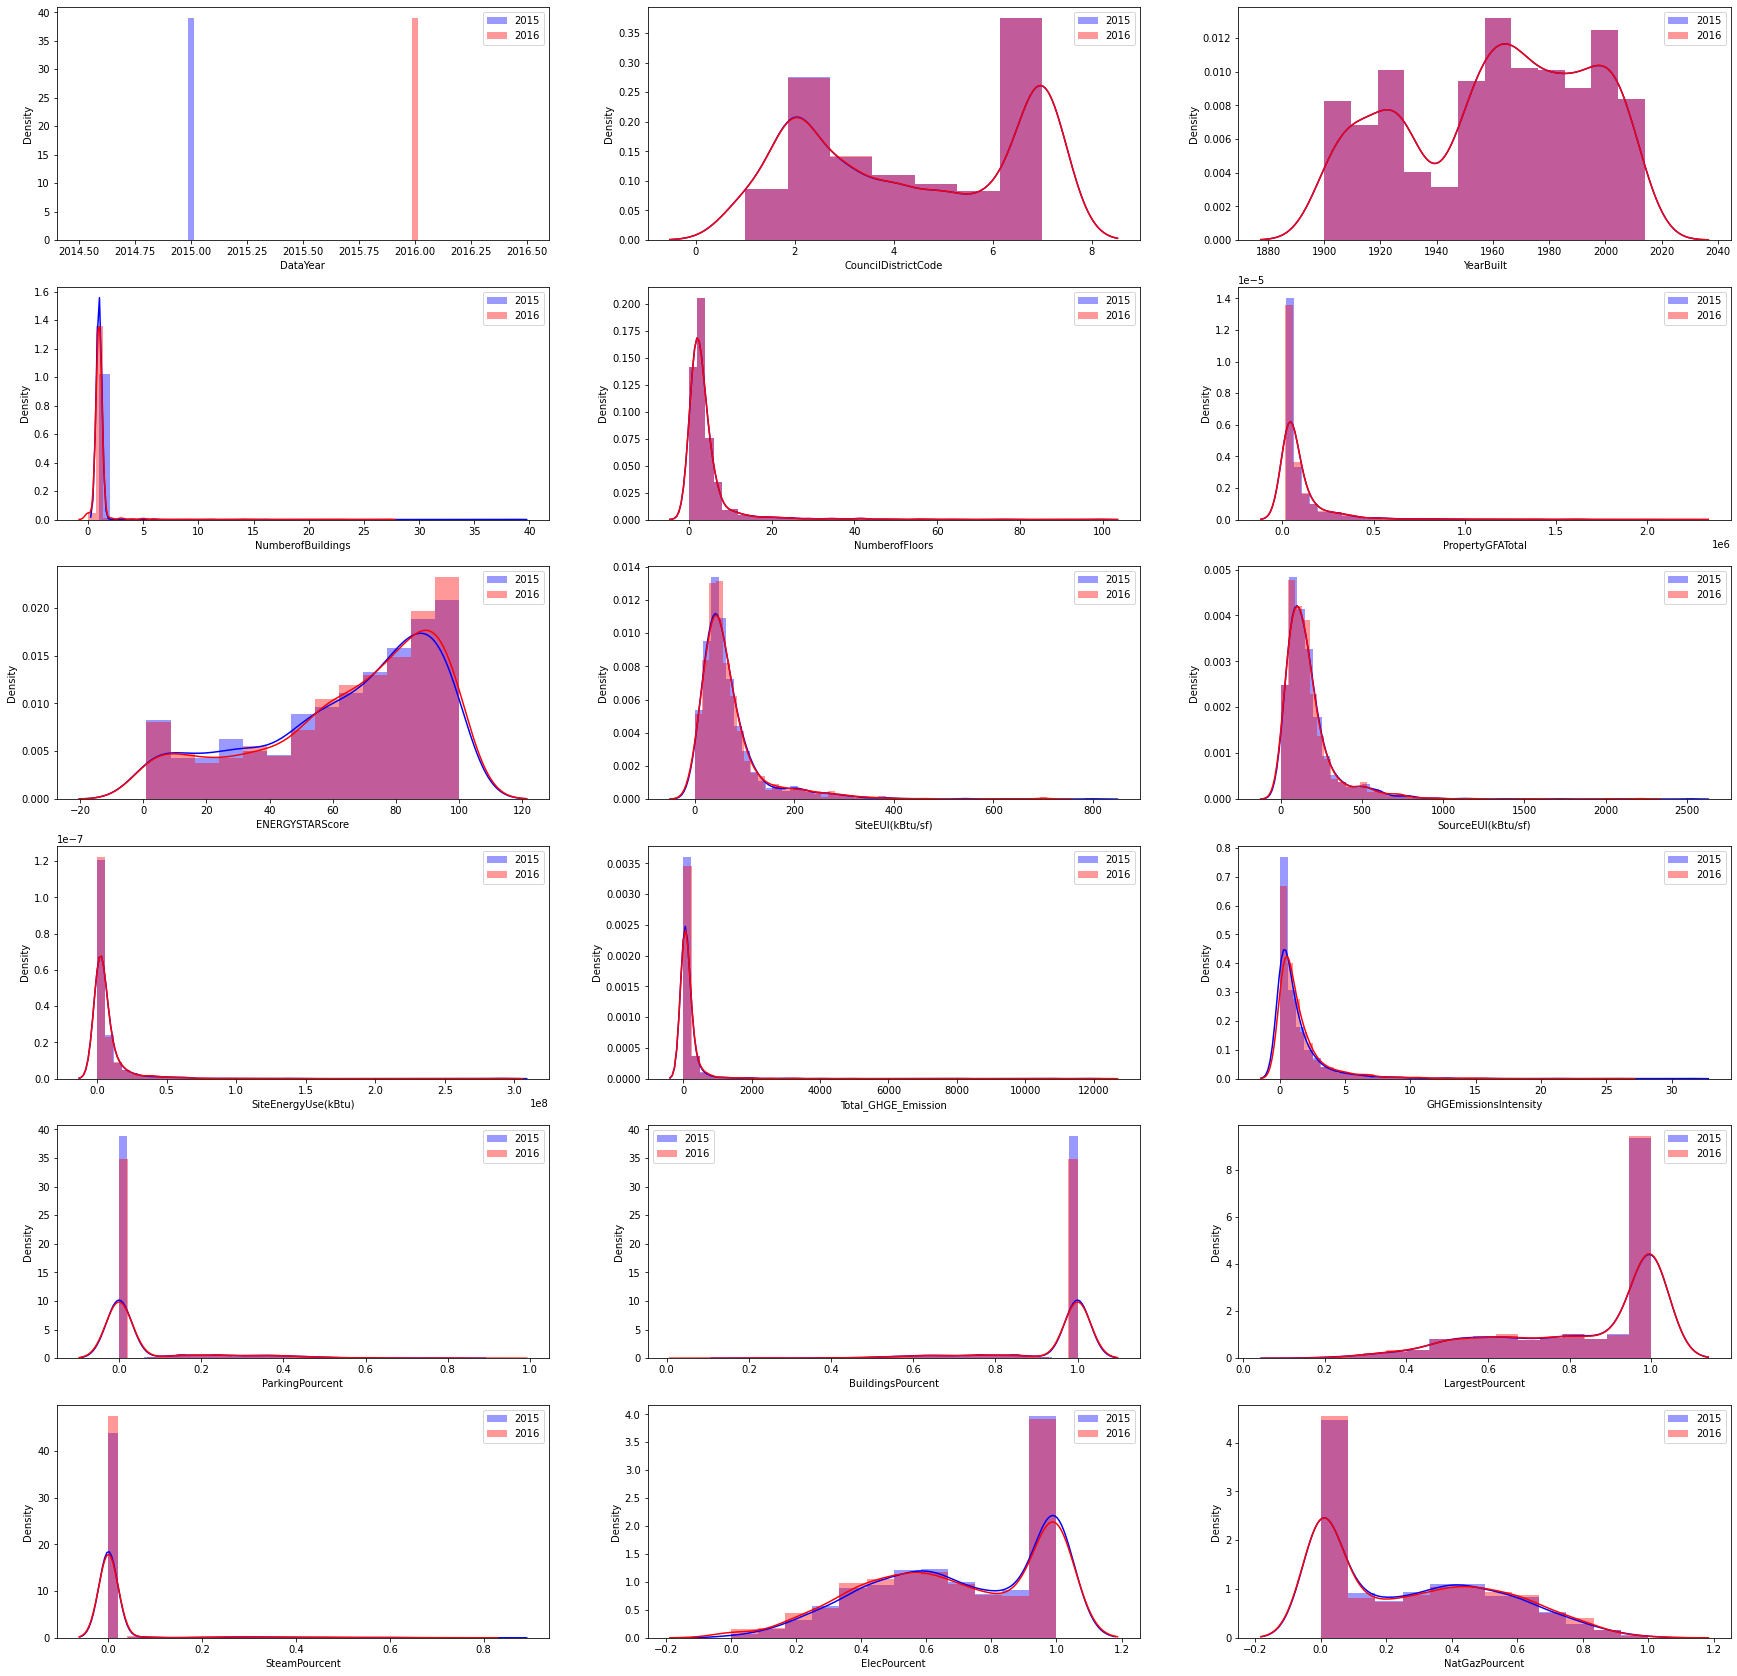

In [185]:
n_rows = 6
n_cols = 3
f, axes = plt.subplots(n_rows, n_cols, figsize=(30, 30))

ax_list = []
for row_idx in range(n_rows):
    for col_idx in range(n_cols):
        ax_list.append(axes[row_idx,col_idx])

pointer = 0
for col in lst_colquant:
    sns.distplot(df1_[col], color="b",ax=ax_list[pointer],label='2015');
    sns.distplot(df2_[col], color="r",ax=ax_list[pointer],label='2016');
    ax_list[pointer].legend()
 
    pointer+=1

In [186]:
df1_['NRJuselog']=np.log10(1+df1_['SiteEnergyUse(kBtu)'])

In [187]:
df1_['GHGEemissionlog']=np.log10(1+df1_.Total_GHGE_Emission)

In [188]:
df1_['GFAtotlog']=np.log10(1+df1_.PropertyGFATotal)

In [189]:
df2_['NRJuselog']=np.log10(1+df2_['SiteEnergyUse(kBtu)'])
df2_['GHGEemissionlog']=np.log10(1+df2_.Total_GHGE_Emission)
df2_['GFAtotlog']=np.log10(1+df2_.PropertyGFATotal)

In [190]:
aff=['NRJuselog','GHGEemissionlog','GFAtotlog']

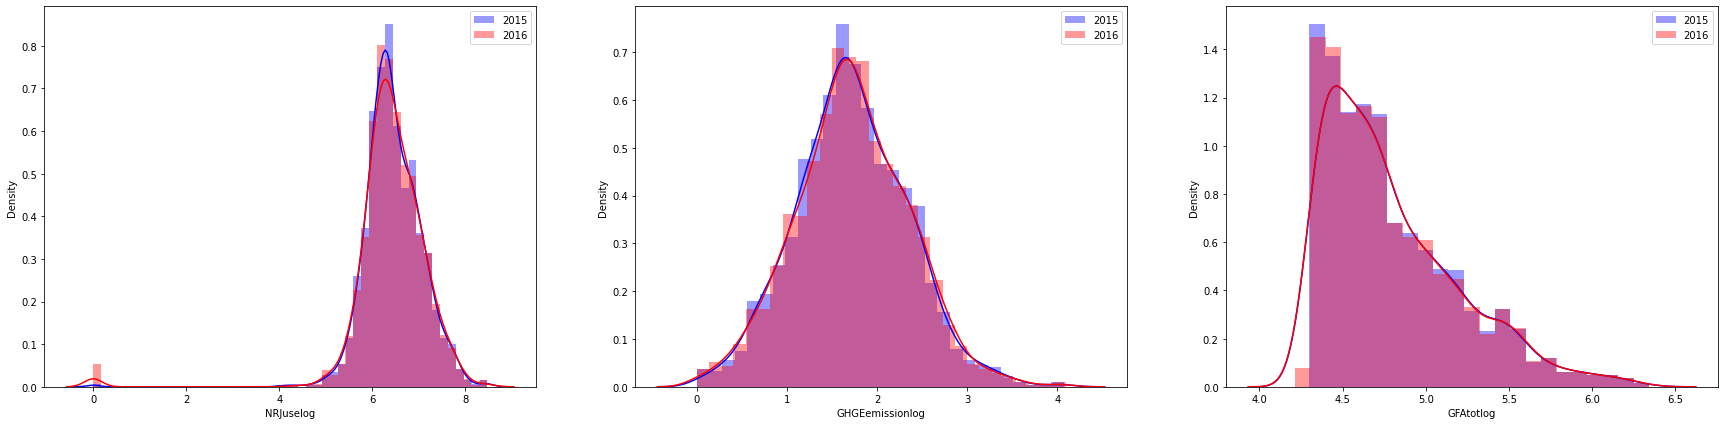

In [191]:
n_rows = 1
n_cols = 3
f, axes = plt.subplots(n_rows, n_cols, figsize=(30, 7))



pointer = 0
for col in aff:
    sns.distplot(df1_[col], color="b",ax=axes[pointer],label='2015');
    sns.distplot(df2_[col], color="r",ax=axes[pointer],label='2016');
    axes[pointer].legend()
 
    pointer+=1

In [192]:
df1_['age']=df1_.DataYear-df1_.YearBuilt
df2_['age']=df2_.DataYear-df2_.YearBuilt


In [193]:
df1_.DataYear.replace({2015:1},inplace=True)
df2_.DataYear.replace({2016:2},inplace=True)

Corrélations: 

In [194]:
DF=pd.DataFrame(df1_['SiteEUI(kBtu/sf)']*df1_.PropertyGFATotal,columns=['Site'])

In [195]:
DF['energy']=df1_['SiteEnergyUse(kBtu)']
DF['Source']=df1_['SourceEUI(kBtu/sf)']*df1_.PropertyGFATotal

In [196]:
DF.corr()

,Site,energy,Source
Site,1.000000,0.972095,0.980389
energy,0.972095,1.000000,0.937479
Source,0.980389,0.937479,1.000000


#### 2.2 Analyse variables Qualitatives <a class="anchor" id="section_2_2"></a>


In [197]:
df1_

,DataYear,CouncilDistrictCode,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,LargestPropertyUseType,ENERGYSTARScore,SiteEUI(kBtu/sf),SourceEUI(kBtu/sf),...,ParkingPourcent,BuildingsPourcent,LargestPourcent,SteamPourcent,ElecPourcent,NatGazPourcent,NRJuselog,GHGEemissionlog,GFAtotlog,age
OSEBuildingID,,,,,,,,,,,,,,,,,,,,,
1,1,7,1927,1,12,88434,Logement-hotel,65.0,78.9,173.5,...,0.000000,1.000000,1.000000,0.289773,0.527995,0.182253,6.843944,2.398686,4.946624,88
2,1,7,1996,1,11,103566,Logement-hotel,51.0,94.4,191.3,...,0.145453,0.854547,0.809918,0.000000,0.467477,0.532542,6.921907,2.422442,5.015221,19
3,1,7,1969,1,41,961990,Logement-hotel,18.0,96.6,242.7,...,0.000000,1.000000,0.787163,0.268839,0.680459,0.050730,7.864099,3.314390,5.983171,46
24579,1,2,1916,1,1,27760,Autre,NaN,62.6,117.8,...,0.000000,1.000000,0.710195,0.000000,0.398059,0.601958,6.373033,1.919183,4.443435,99
5,1,7,1926,1,10,61320,Logement-hotel,1.0,460.4,636.3,...,0.000000,1.000000,1.000000,0.830998,0.098090,0.070915,7.450700,3.287206,4.787609,89
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24547,1,3,1929,1,2,24152,Enseignement,100.0,2.3,6.9,...,0.000000,1.000000,1.000000,0.000000,0.900943,0.000000,4.752002,0.130334,4.382971,86
24560,1,5,1949,1,2,43645,Enseignement,63.0,57.5,94.1,...,0.000000,1.000000,0.847749,0.000000,0.281519,0.718493,6.327577,1.936011,4.639944,66
24563,1,5,1952,1,1,26853,commerce,63.0,71.4,203.6,...,0.000000,1.000000,0.758202,0.000000,0.863179,0.136856,6.162207,1.307496,4.429009,63


### Préparation des datasets pour prédiction <a class="anchor" id="chapter3"></a>

Modification à faire: 


Voir le nombre de building et floor à 0 on les met à 1 par défaut car c'est impossible 

Faire un choix pour le regroupement des variables catégorielles quand il y a trop de unique! 

In [198]:
df1_.columns

Index(['DataYear', 'CouncilDistrictCode', 'YearBuilt', 'NumberofBuildings',
       'NumberofFloors', 'PropertyGFATotal', 'LargestPropertyUseType',
       'ENERGYSTARScore', 'SiteEUI(kBtu/sf)', 'SourceEUI(kBtu/sf)',
       'SiteEnergyUse(kBtu)', 'Total_GHGE_Emission', 'GHGEmissionsIntensity',
       'Latitude', 'Longitude', 'ParkingPourcent', 'BuildingsPourcent',
       'LargestPourcent', 'SteamPourcent', 'ElecPourcent', 'NatGazPourcent',
       'NRJuselog', 'GHGEemissionlog', 'GFAtotlog', 'age'],
      dtype='object')

In [199]:
lst_model=['DataYear', 'CouncilDistrictCode', 'NumberofBuildings',
       'NumberofFloors', 'LargestPropertyUseType',
       'ENERGYSTARScore', 'ParkingPourcent', 'BuildingsPourcent',
       'LargestPourcent', 'SteamPourcent', 'ElecPourcent', 'NatGazPourcent',
       'NRJuselog', 'GHGEemissionlog', 'GFAtotlog', 'age']

In [200]:
dftrain=pd.DataFrame()

In [201]:
dftrain=dftrain.append(df1_[lst_model].reset_index(drop=True)).append(df2_[lst_model].reset_index(drop=True)).reset_index(drop=True)

In [159]:
dftrain.isna().mean()

DataYear                  0.000000
CouncilDistrictCode       0.000000
NumberofBuildings         0.000000
NumberofFloors            0.000000
LargestPropertyUseType    0.000000
ENERGYSTARScore           0.332252
ParkingPourcent           0.000000
BuildingsPourcent         0.000000
LargestPourcent           0.000000
SteamPourcent             0.000000
ElecPourcent              0.000000
NatGazPourcent            0.000000
NRJuselog                 0.000000
GHGEemissionlog           0.000000
GFAtotlog                 0.000000
age                       0.000000
dtype: float64

In [160]:
dftrain

,DataYear,CouncilDistrictCode,NumberofBuildings,NumberofFloors,LargestPropertyUseType,ENERGYSTARScore,ParkingPourcent,BuildingsPourcent,LargestPourcent,SteamPourcent,ElecPourcent,NatGazPourcent,NRJuselog,GHGEemissionlog,GFAtotlog,age
0,1,7,1,12,Logement-hotel,65.0,0.000000,1.000000,1.000000,0.289773,0.527995,0.182253,6.843944,2.398686,4.946624,88
1,1,7,1,11,Logement-hotel,51.0,0.145453,0.854547,0.809918,0.000000,0.467477,0.532542,6.921907,2.422442,5.015221,19
2,1,7,1,41,Logement-hotel,18.0,0.000000,1.000000,0.787163,0.268839,0.680459,0.050730,7.864099,3.314390,5.983171,46
3,1,2,1,1,Autre,NaN,0.000000,1.000000,0.710195,0.000000,0.398059,0.601958,6.373033,1.919183,4.443435,99
4,1,7,1,10,Logement-hotel,1.0,0.000000,1.000000,1.000000,0.830998,0.098090,0.070915,7.450700,3.287206,4.787609,89
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3077,2,3,1,2,Enseignement,100.0,0.000000,1.000000,1.000000,0.000000,0.999997,0.000000,5.207808,0.326336,4.382971,87
3078,2,5,1,2,Enseignement,71.0,0.000000,1.000000,0.847749,0.000000,0.252625,0.747376,6.312591,1.935255,4.639944,67
3079,2,5,1,1,commerce,68.0,0.000000,1.000000,0.758202,0.000000,0.818648,0.181352,6.145838,1.351410,4.429009,64
3080,2,5,1,1,commerce,NaN,0.000000,1.000000,0.489733,0.000000,1.000000,0.000000,5.426733,0.456366,4.594956,37


In [161]:
dftrain.LargestPropertyUseType.replace(rename,inplace=True)

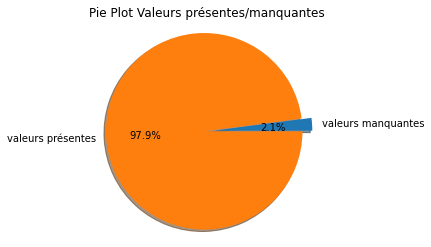

<Figure size 432x288 with 0 Axes>

In [162]:
pie_remplissage(dftrain)

In [163]:
dftrain

,DataYear,CouncilDistrictCode,NumberofBuildings,NumberofFloors,LargestPropertyUseType,ENERGYSTARScore,ParkingPourcent,BuildingsPourcent,LargestPourcent,SteamPourcent,ElecPourcent,NatGazPourcent,NRJuselog,GHGEemissionlog,GFAtotlog,age
0,1,7,1,12,Logement-hotel,65.0,0.000000,1.000000,1.000000,0.289773,0.527995,0.182253,6.843944,2.398686,4.946624,88
1,1,7,1,11,Logement-hotel,51.0,0.145453,0.854547,0.809918,0.000000,0.467477,0.532542,6.921907,2.422442,5.015221,19
2,1,7,1,41,Logement-hotel,18.0,0.000000,1.000000,0.787163,0.268839,0.680459,0.050730,7.864099,3.314390,5.983171,46
3,1,2,1,1,Autre,NaN,0.000000,1.000000,0.710195,0.000000,0.398059,0.601958,6.373033,1.919183,4.443435,99
4,1,7,1,10,Logement-hotel,1.0,0.000000,1.000000,1.000000,0.830998,0.098090,0.070915,7.450700,3.287206,4.787609,89
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3077,2,3,1,2,Enseignement,100.0,0.000000,1.000000,1.000000,0.000000,0.999997,0.000000,5.207808,0.326336,4.382971,87
3078,2,5,1,2,Enseignement,71.0,0.000000,1.000000,0.847749,0.000000,0.252625,0.747376,6.312591,1.935255,4.639944,67
3079,2,5,1,1,commerce,68.0,0.000000,1.000000,0.758202,0.000000,0.818648,0.181352,6.145838,1.351410,4.429009,64
3080,2,5,1,1,commerce,NaN,0.000000,1.000000,0.489733,0.000000,1.000000,0.000000,5.426733,0.456366,4.594956,37


In [155]:
dftrain.to_csv('test.csv',header=True,index=False)

In [156]:
tsst=pd.read_csv('test.csv')

<AxesSubplot:>

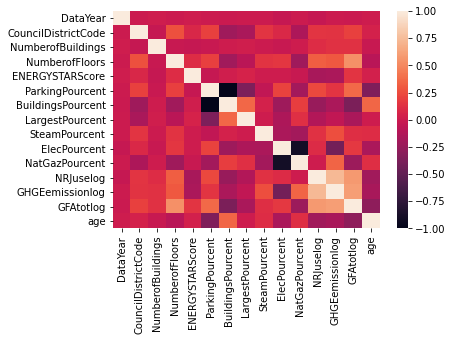

In [208]:
sns.heatmap(dftrain.corr())

Text(0.5, 1.0, 'Histogramme et distribution: age des bâtiments')

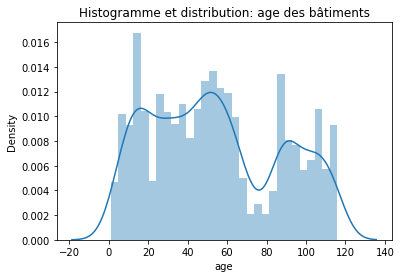

In [207]:
sns.distplot(dftrain.age,bins=30)
plt.title('Histogramme et distribution: age des bâtiments')